In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocess import preprocess_data
from sklearn.model_selection import train_test_split

In [2]:
 # Splitting to Train, Test, Validation and Loading data - was run once and test and validation files were used for all files
data1 = pd.read_csv("data.csv")
train_data, temp_data = train_test_split(data1, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42)
train_data.to_csv("train_data.csv", index=False)
validation_data.to_csv("validation_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)


data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
validation_data = pd.read_csv("validation_data.csv")


In [3]:
data,test_data,validation_data = preprocess_data(data,test_data,validation_data)

Starting preprocessing
Converting Julian Time
Adding 4th of July feature
Adding season feature
Handling nulls
Converting dates to hours
Adding hours to containment feature
Adding is_day feature
Adding days_till_cont feature
Create bins for discovered hour
Add holiday feature
KNN classification starting...
Creating dummies for data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as
Creating dummies for test_data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as
Creating dummies for validation_data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as


In [4]:
data['IS_DAY'].value_counts()

IS_DAY
1    367395
0     32602
Name: count, dtype: int64

# Nullities impact graphs

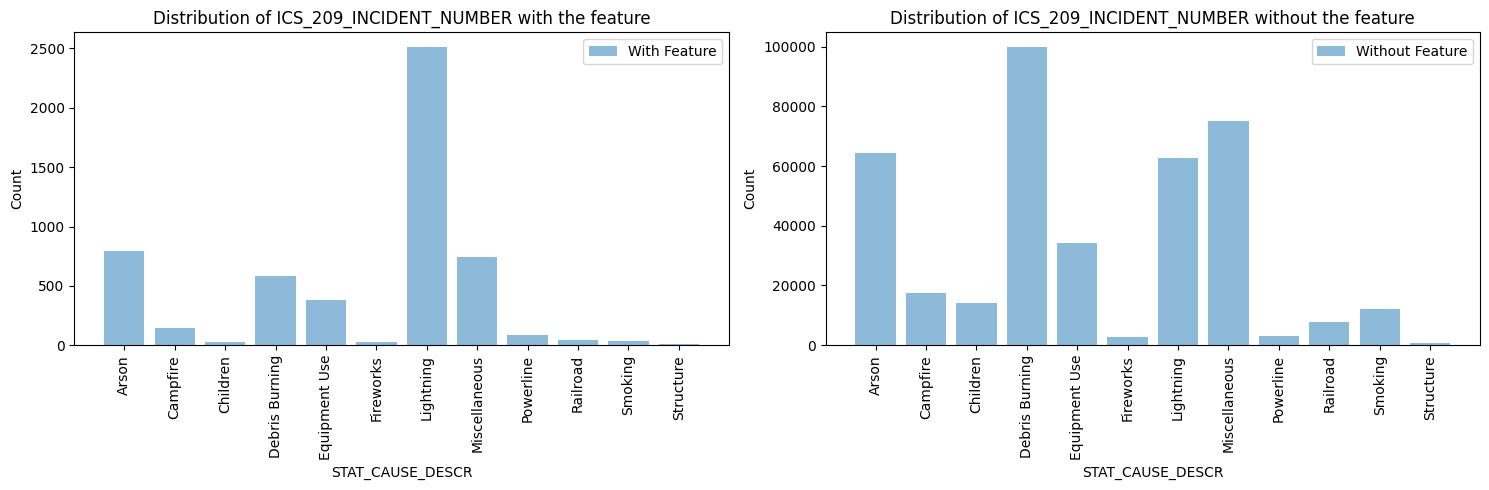

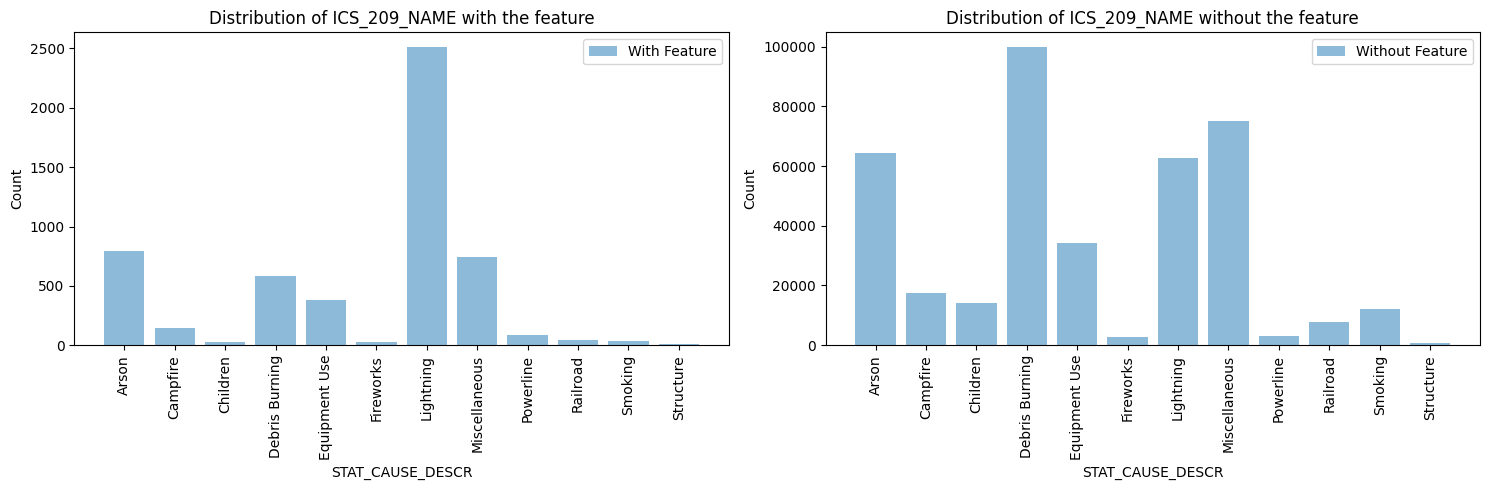

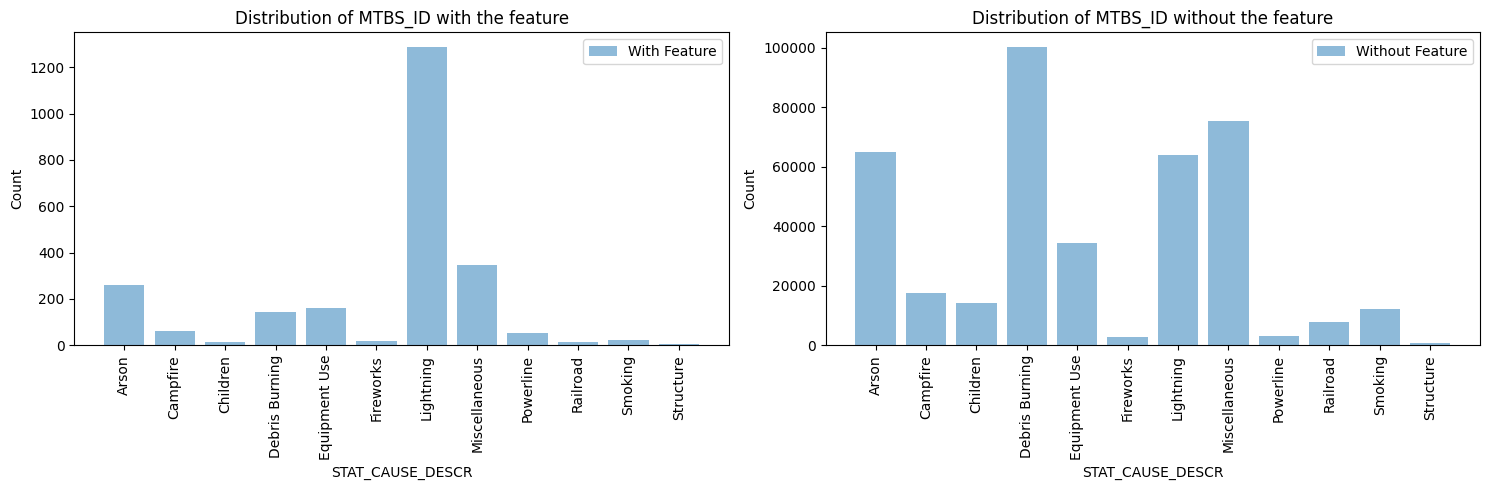

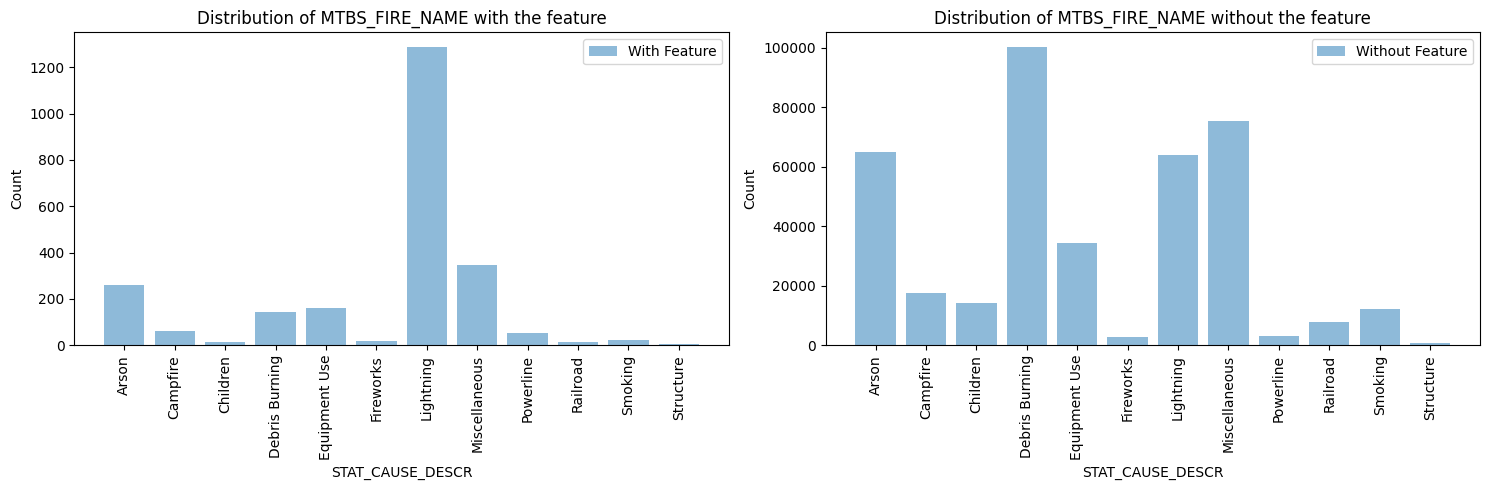

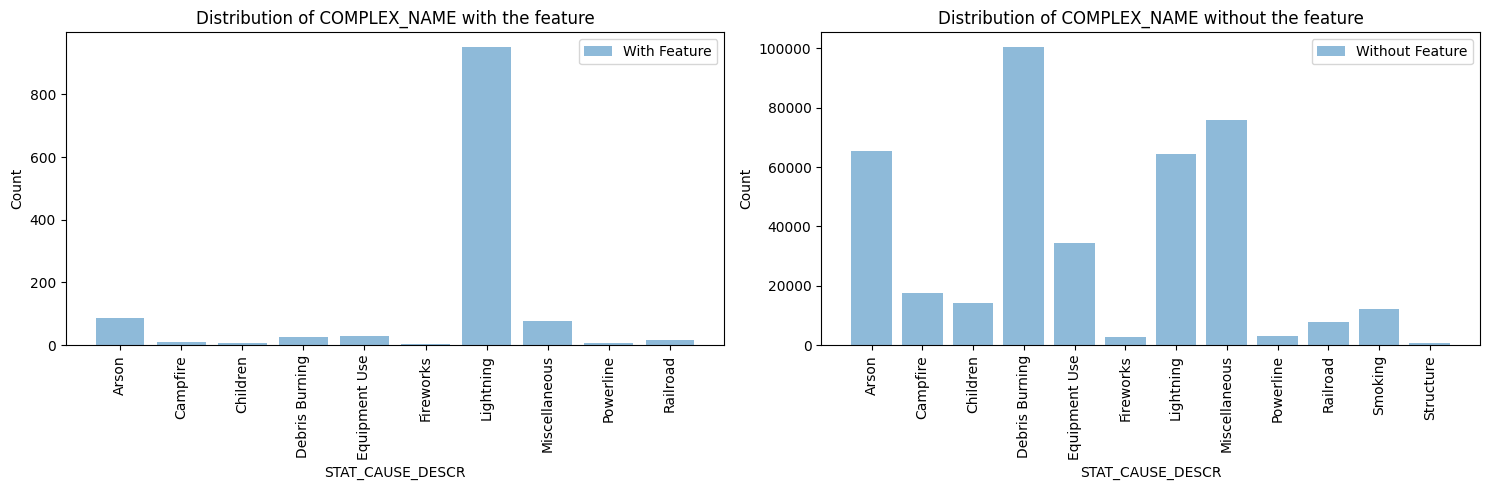

In [5]:
def get_nulliry_features(df):
    null_percentages = (data.isnull().sum() / len(data)) * 100

    # Filter features with over 99% missing values
    features_with_over_99_percent_nullity = null_percentages[null_percentages > 90]

    # Get the features as a list
    return list(features_with_over_99_percent_nullity.index)
def show_dist_without_feature(df, feature:str):
    '''
    Shows destribiution with and without a certain feature 
    the destribiution is show with frequesncy in bins
    '''
    with_feature = df[df[feature].notnull()].groupby(by='STAT_CAUSE_DESCR').size()
    without_feature = df[df[feature].isnull()].groupby(by='STAT_CAUSE_DESCR').size()
    return with_feature, without_feature

# Loop over each feature
for feature in get_nulliry_features(data):
    if feature != 'STAT_CAUSE_DESCR':  # Exclude the target variable from the loop
        with_feature, without_feature = show_dist_without_feature(data, feature)
        # Plotting the distributions side by side
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot for 'With Feature'
        axes[0].bar(with_feature.index, with_feature.values, alpha=0.5, label='With Feature')
        axes[0].set_xlabel('STAT_CAUSE_DESCR')
        axes[0].set_ylabel('Count')
        axes[0].set_title(f'Distribution of {feature} with the feature')
        axes[0].legend()
        axes[0].tick_params(axis='x', rotation=90)
        
        # Plot for 'Without Feature'
        axes[1].bar(without_feature.index, without_feature.values, alpha=0.5, label='Without Feature')
        axes[1].set_xlabel('STAT_CAUSE_DESCR')
        axes[1].set_ylabel('Count')
        axes[1].set_title(f'Distribution of {feature} without the feature')
        axes[1].legend()
        axes[1].tick_params(axis='x', rotation=90)
        
        plt.tight_layout()
        plt.show()
 


# Freq histogram

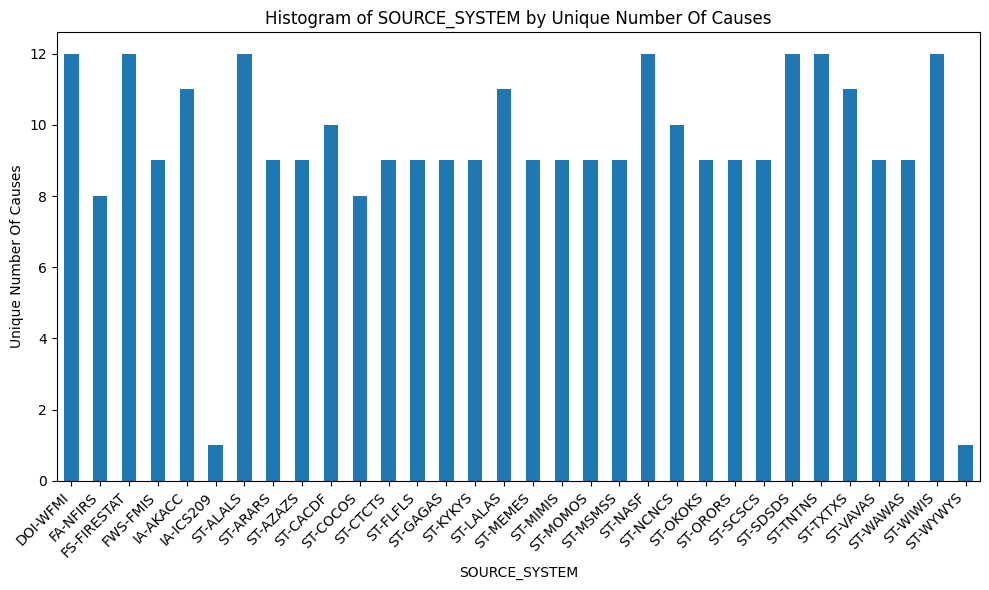

In [6]:
def freq_hist_of_x_by_y(x,y):
    grouped_data = data.groupby(x)[y].nunique()    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar')
#     add generalized value here
    plt.title(f'Histogram of {x} by Unique Number Of Causes')
    plt.xlabel(f'{x}')
    plt.ylabel(f"Unique Number Of Causes")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
freq_hist_of_x_by_y('SOURCE_SYSTEM','STAT_CAUSE_DESCR')
# freq_hist_of_x_by_y('STAT_CAUSE_DESCR','NWCG_REPORTING_AGENCY')


# dist of agency by  cause frequency - Graph

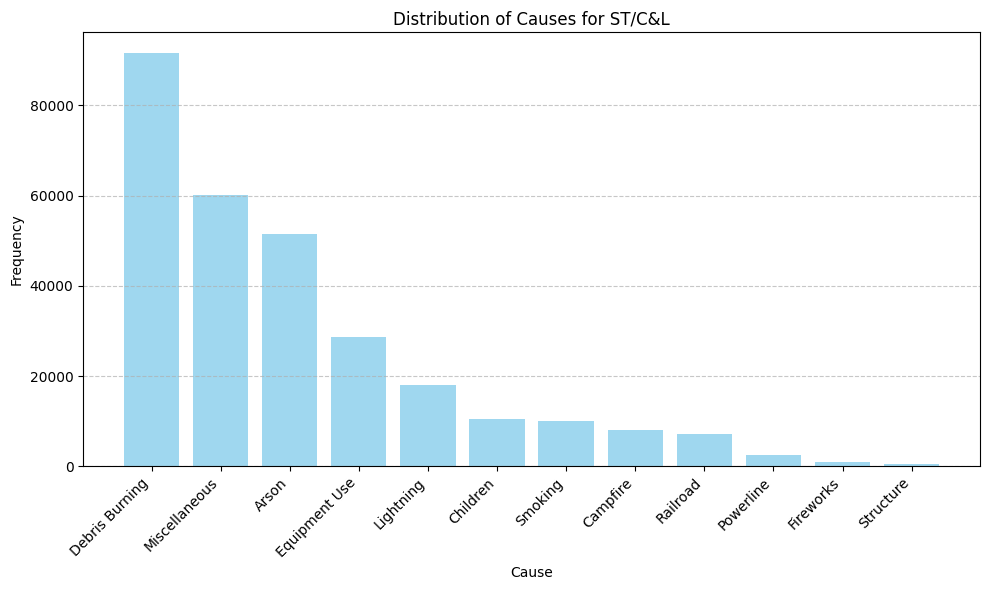

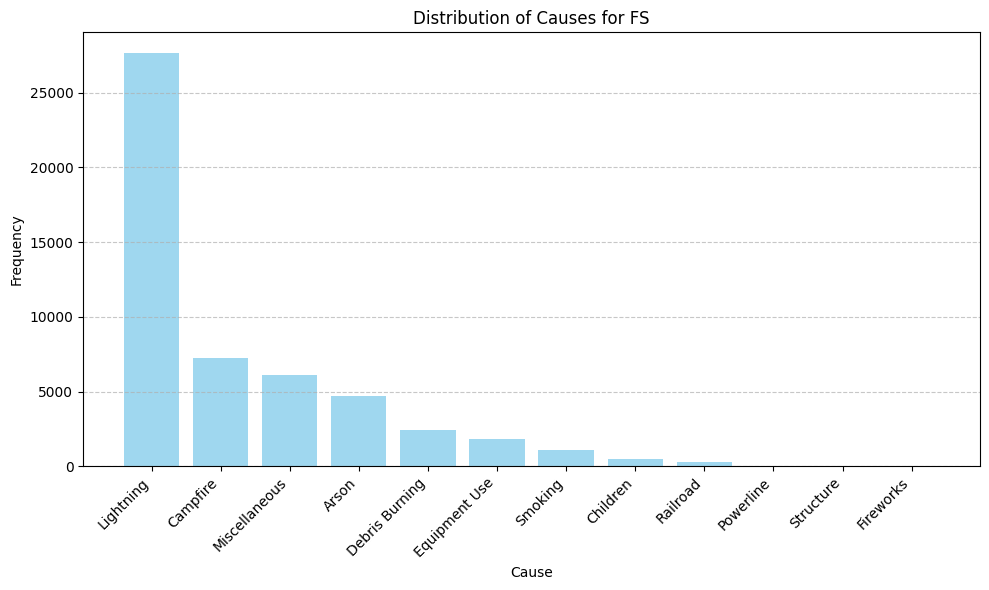

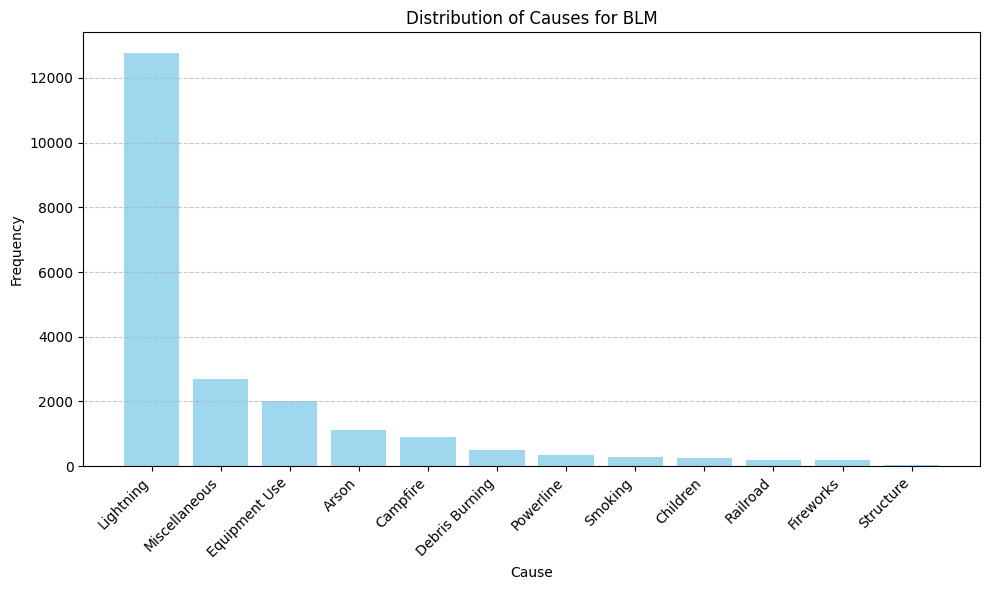

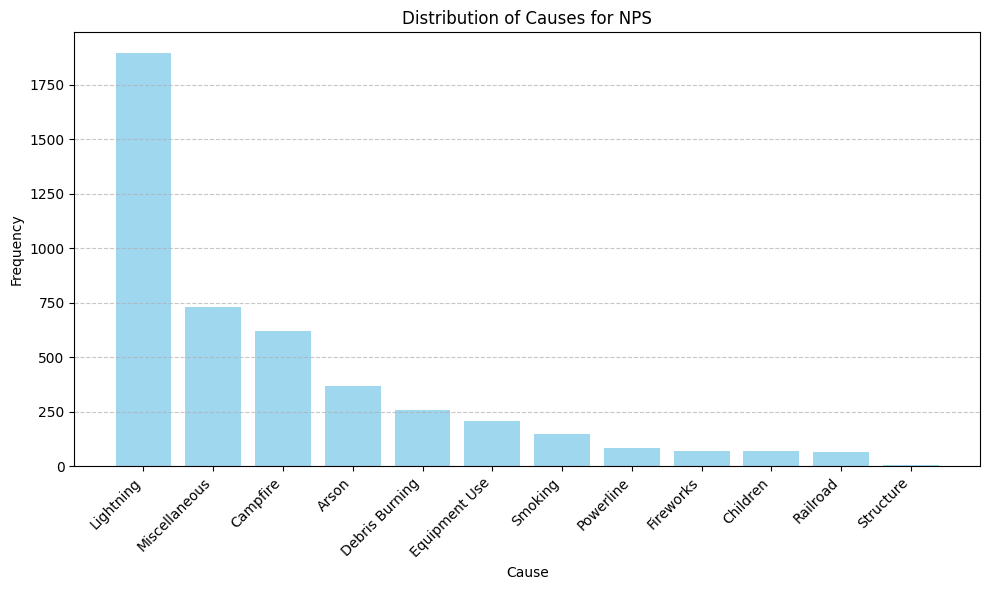

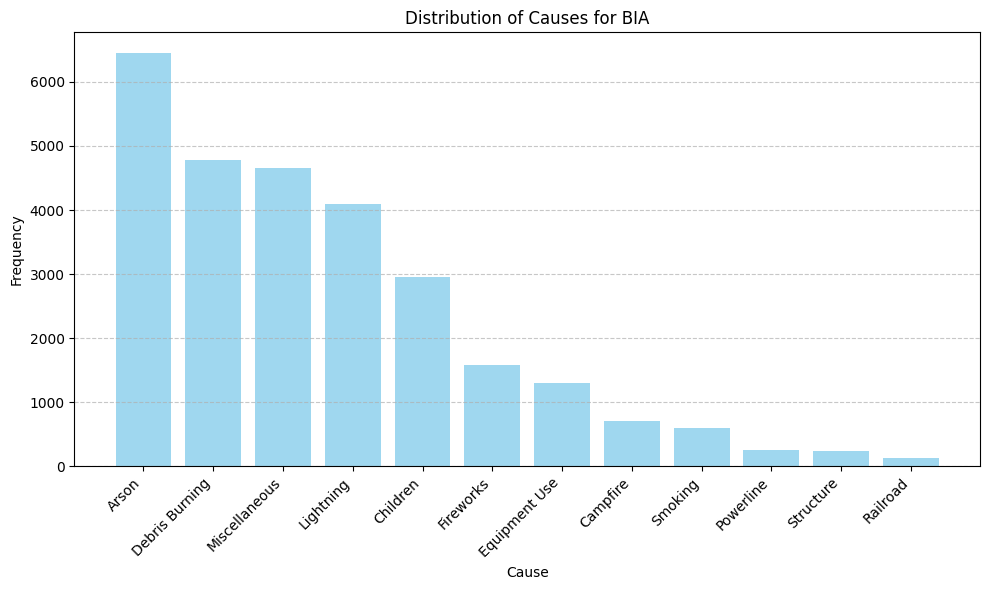

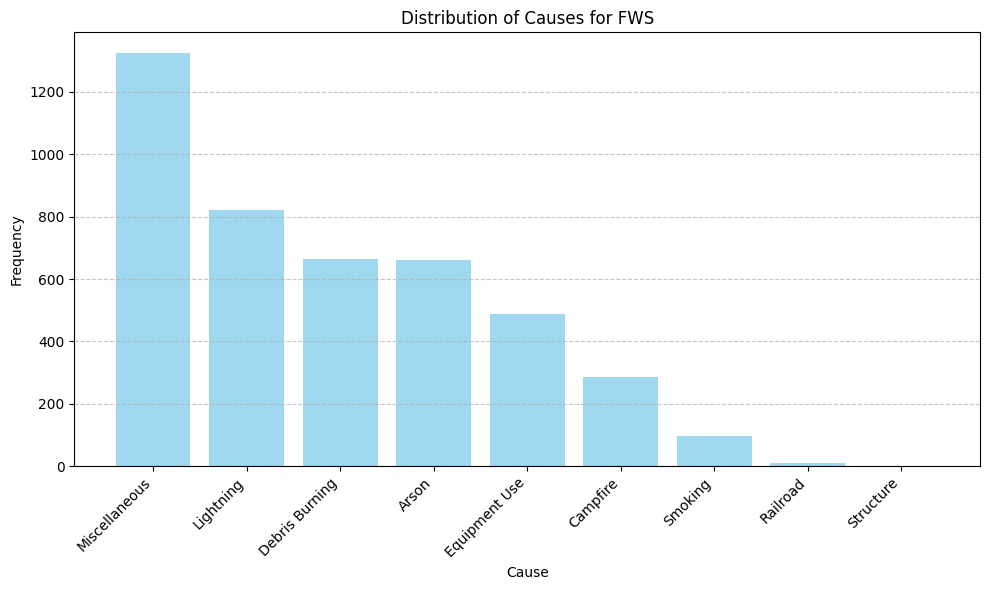

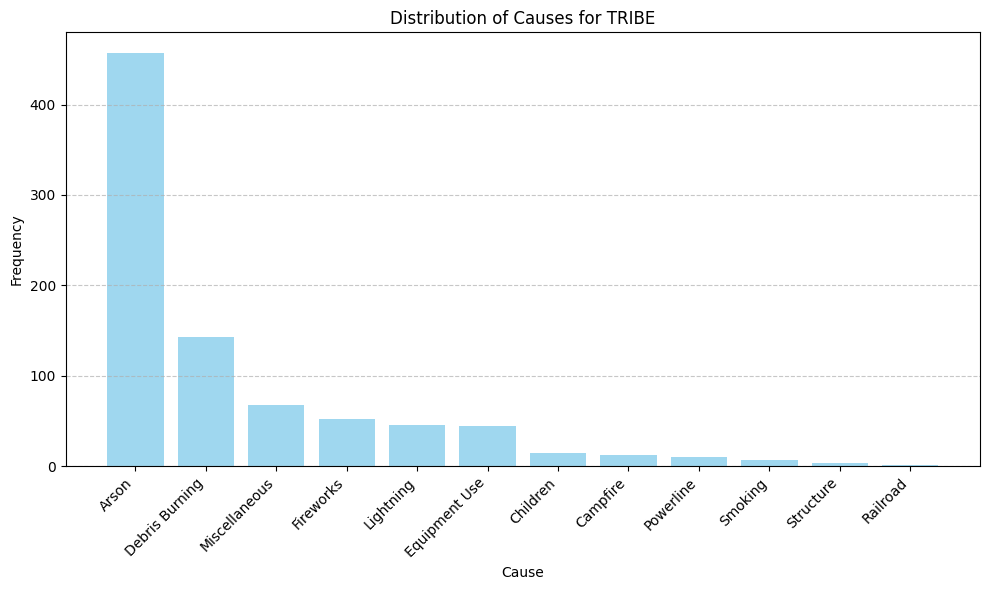

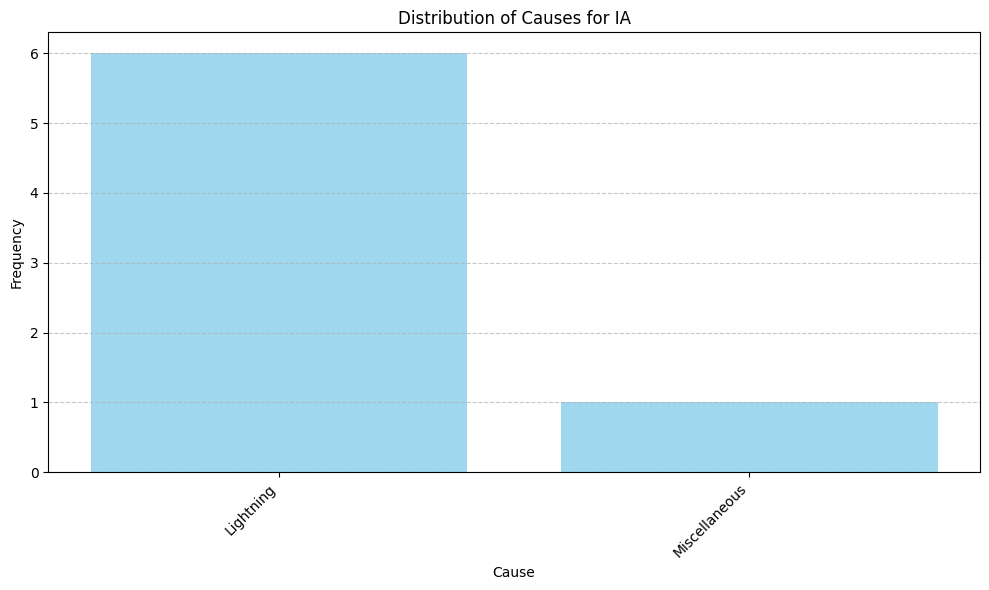

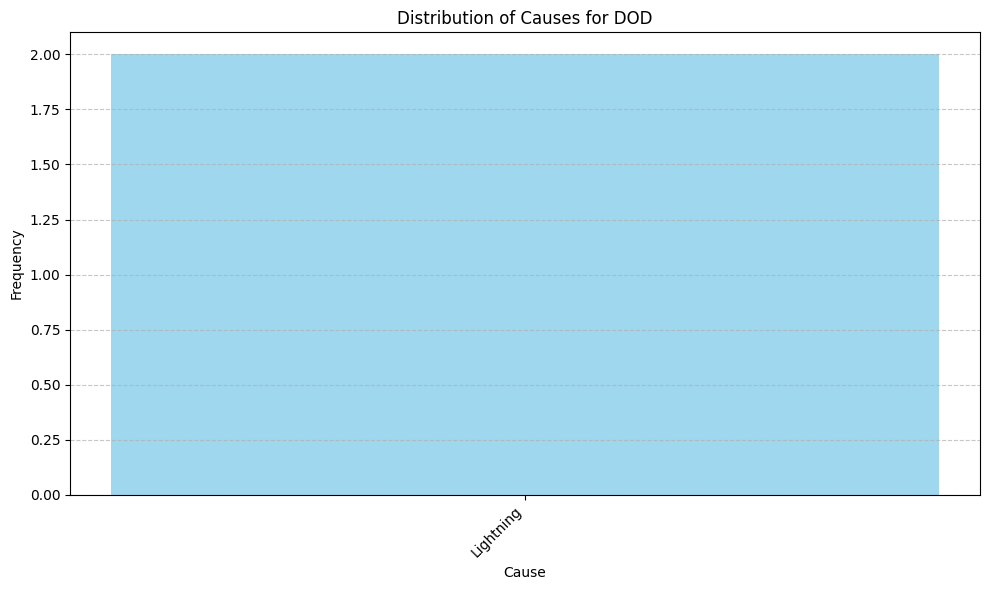

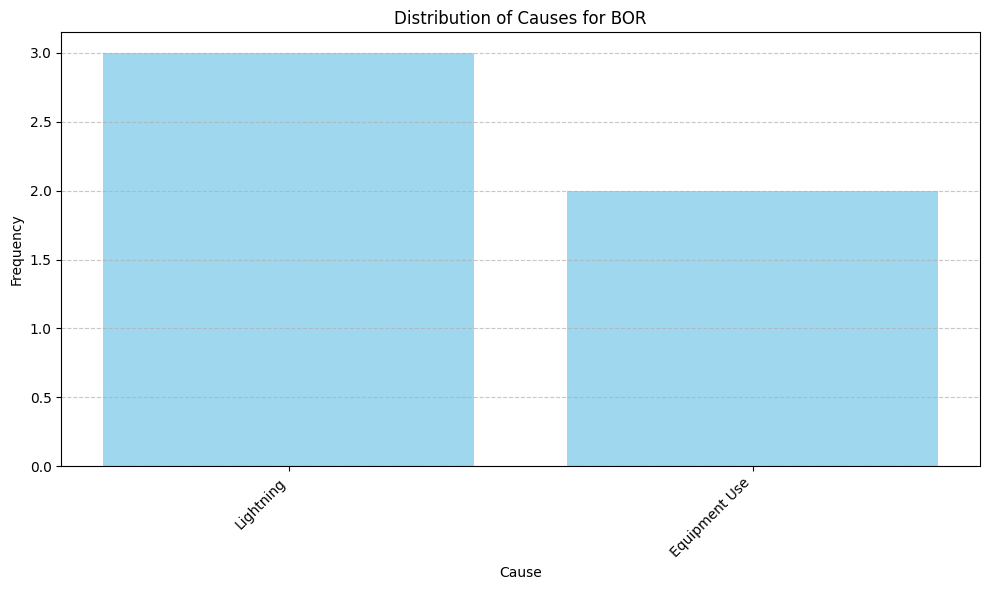

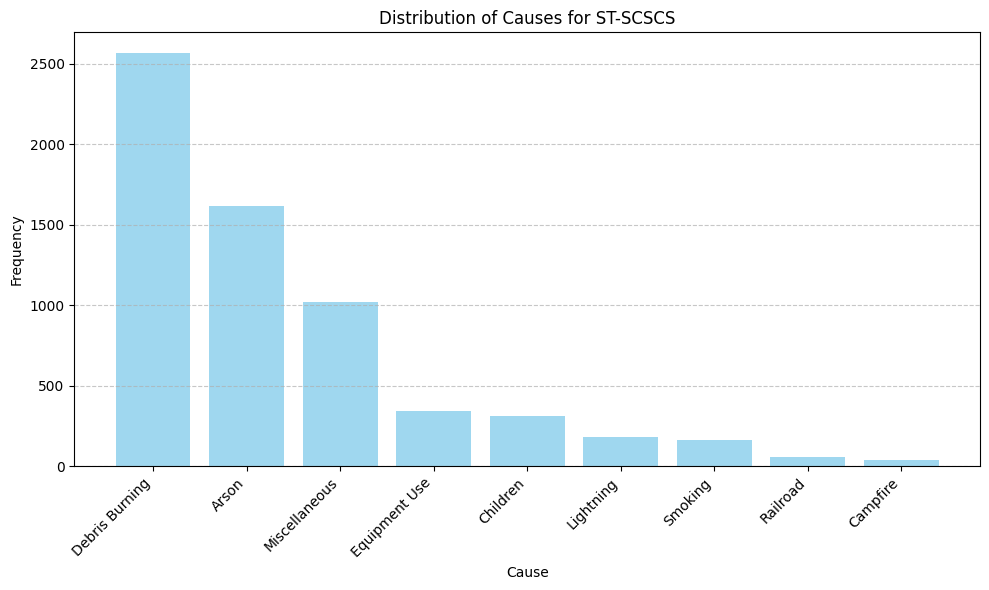

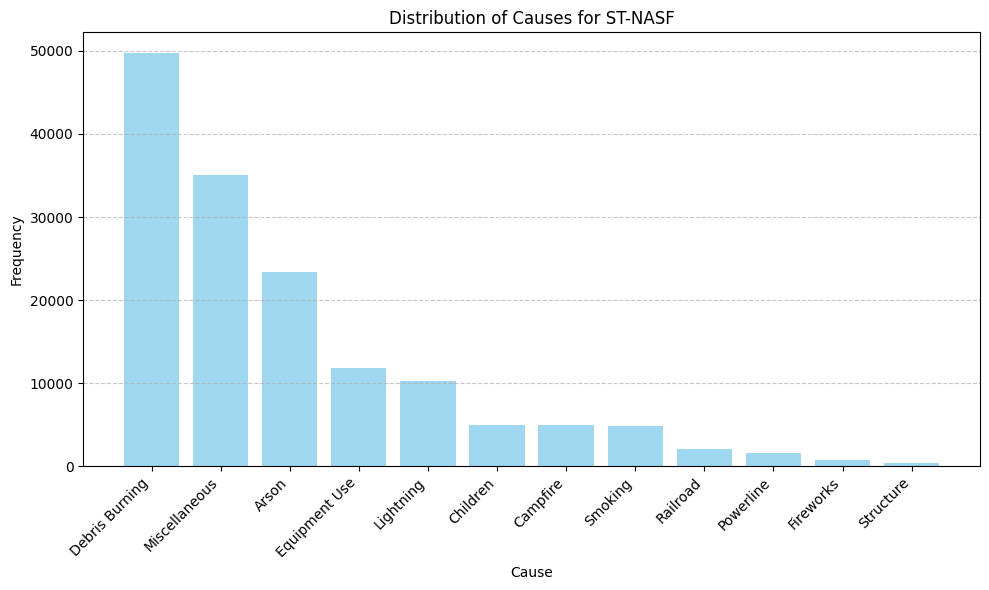

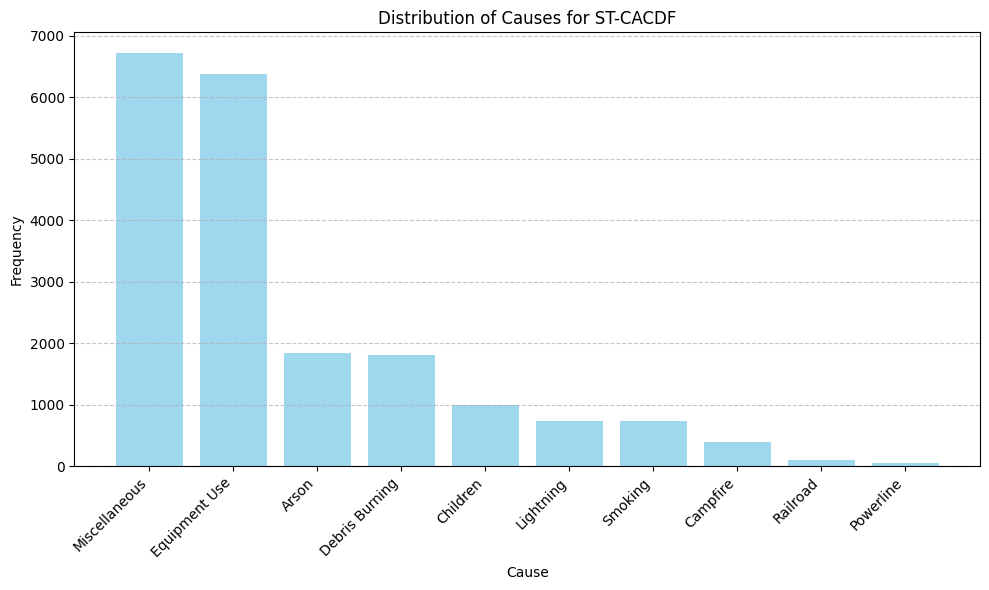

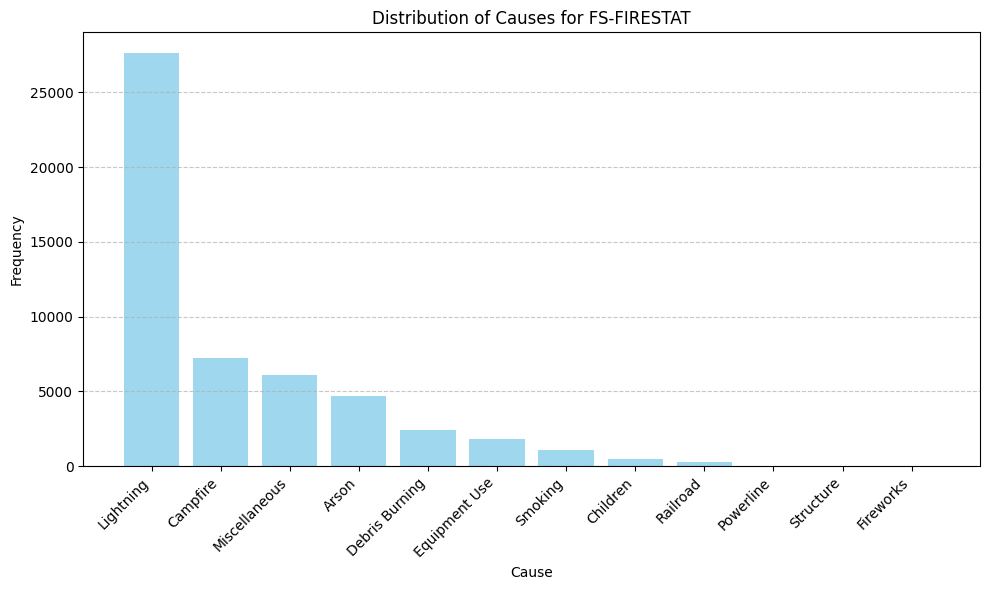

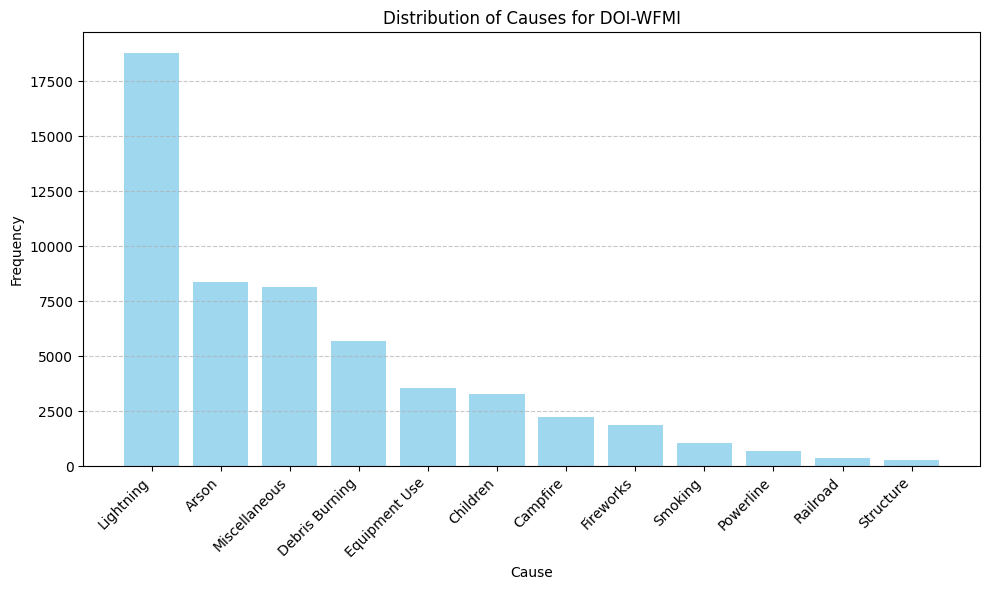

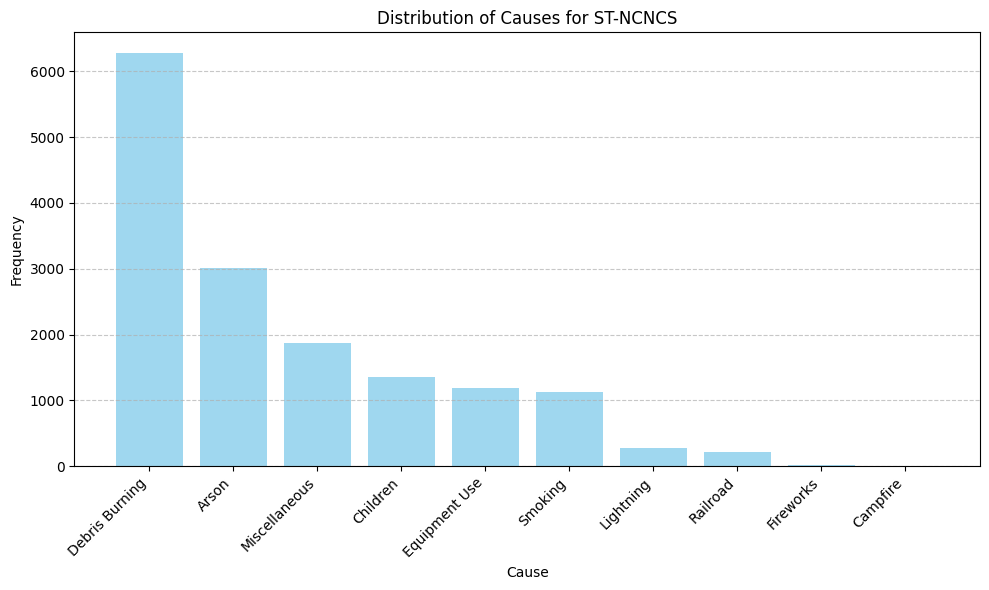

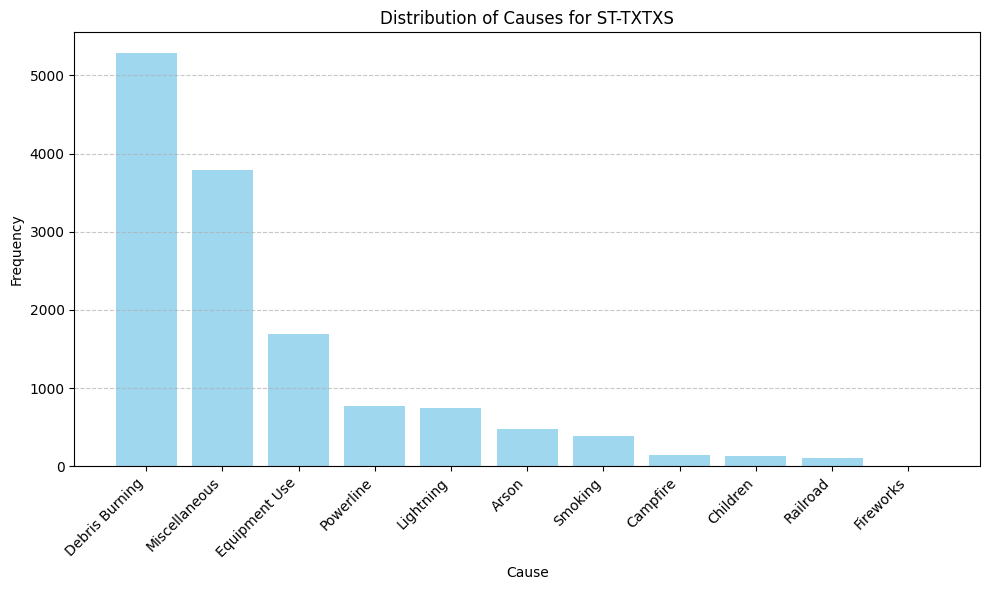

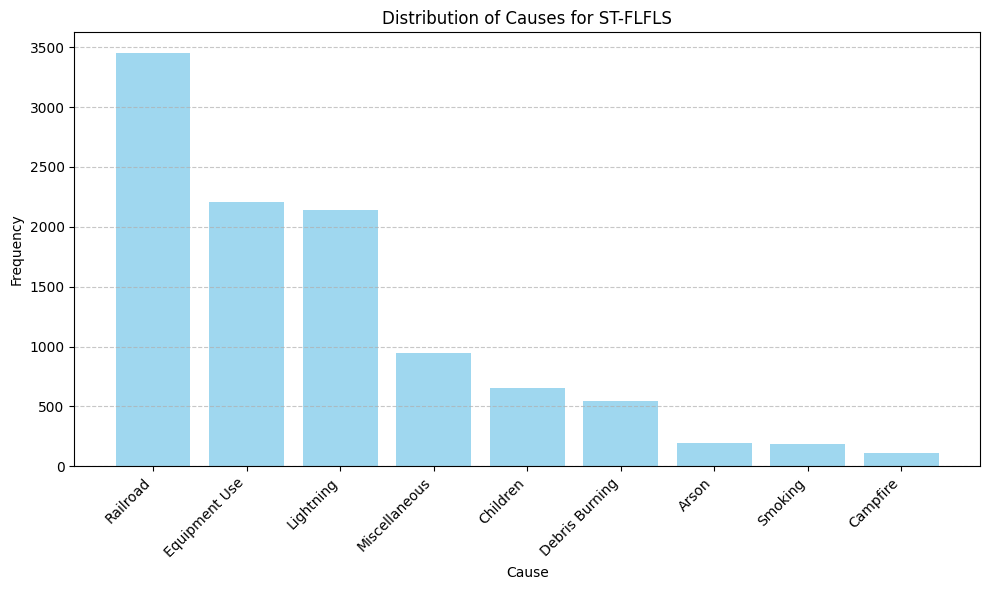

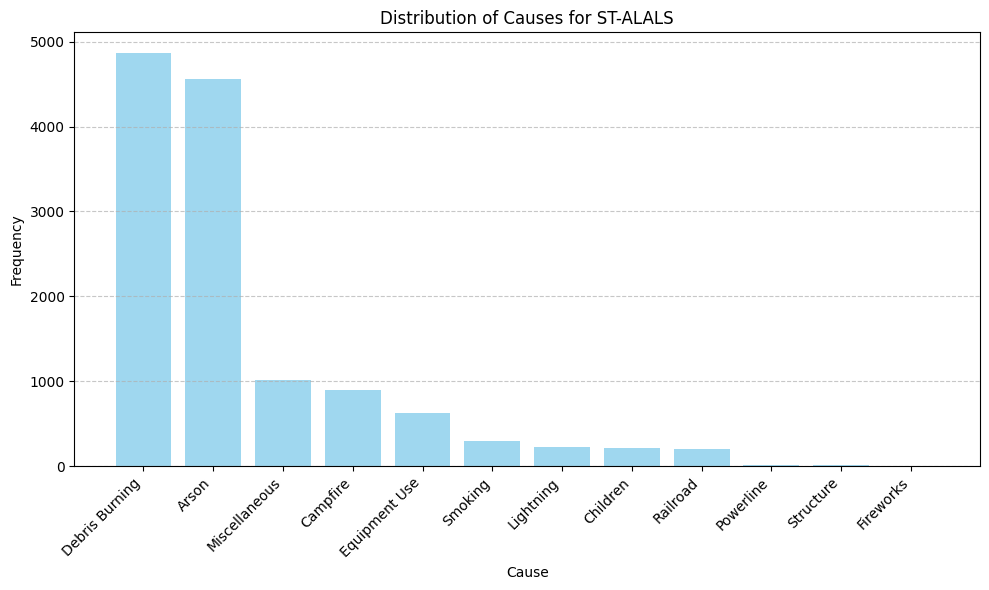

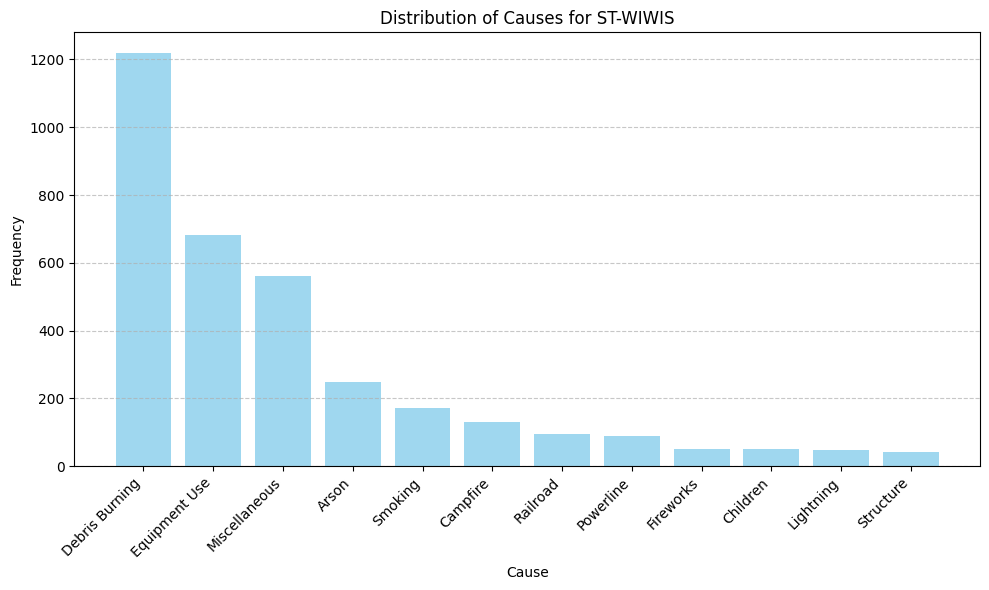

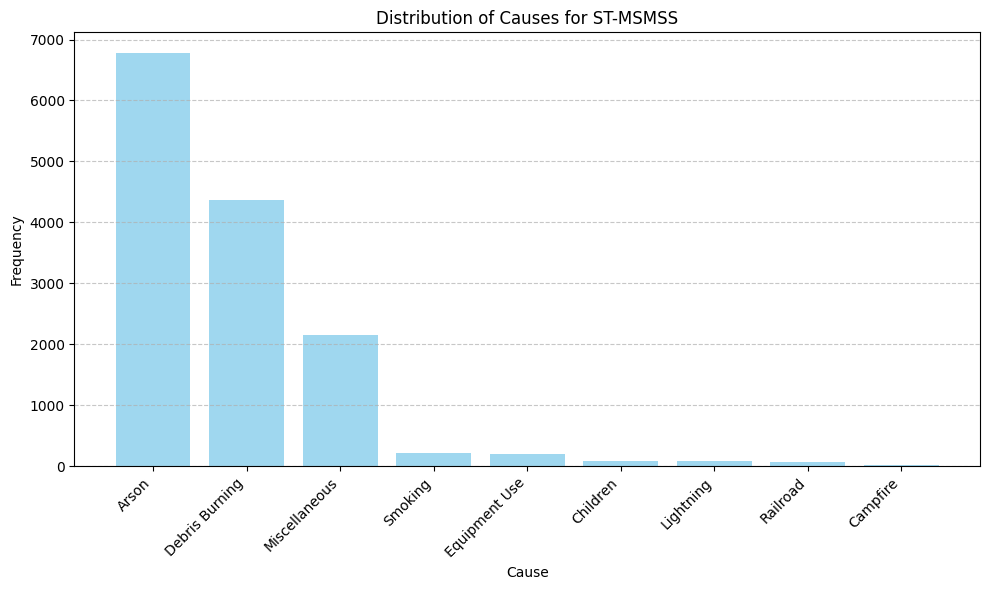

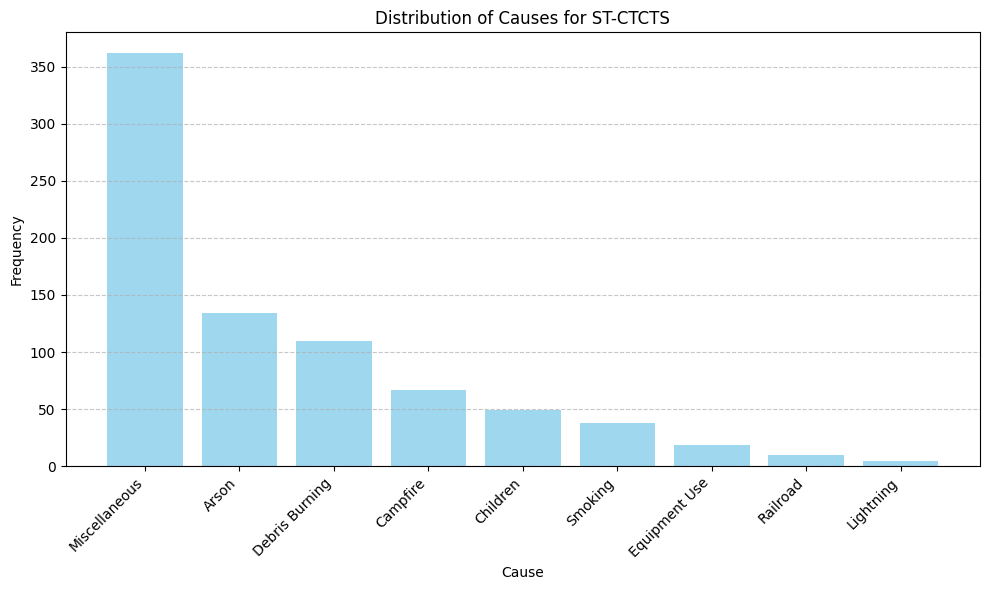

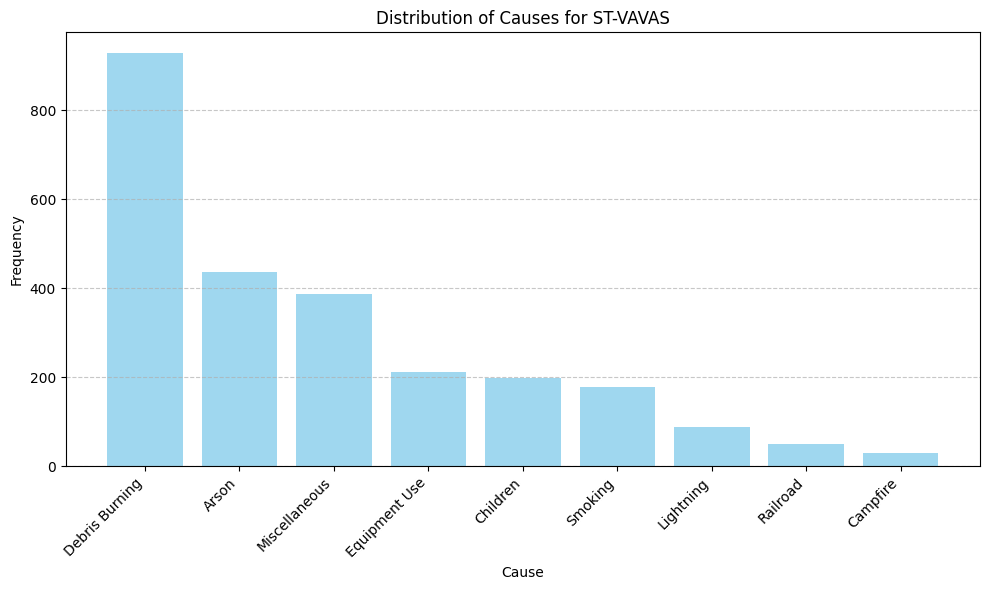

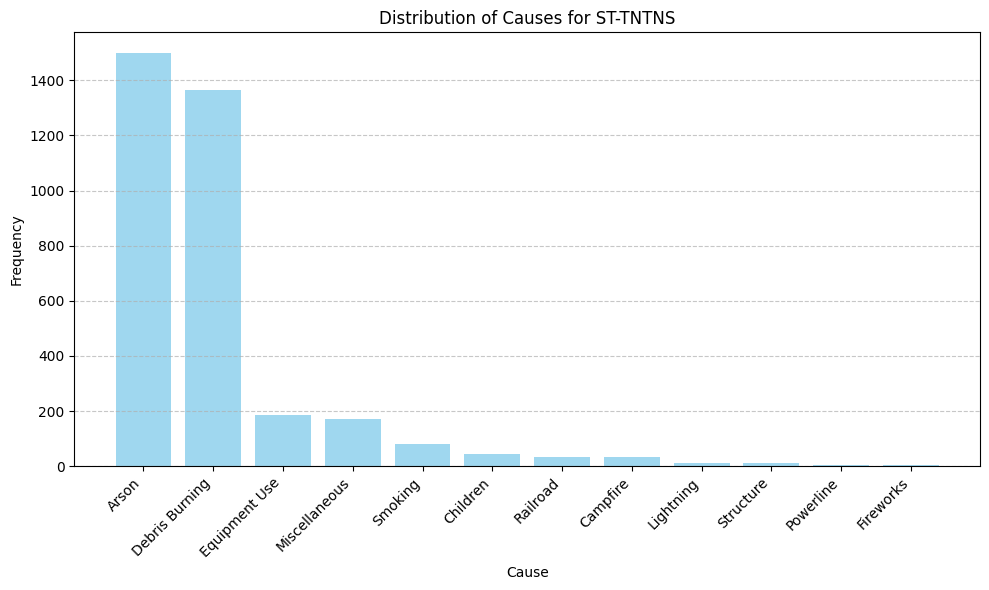

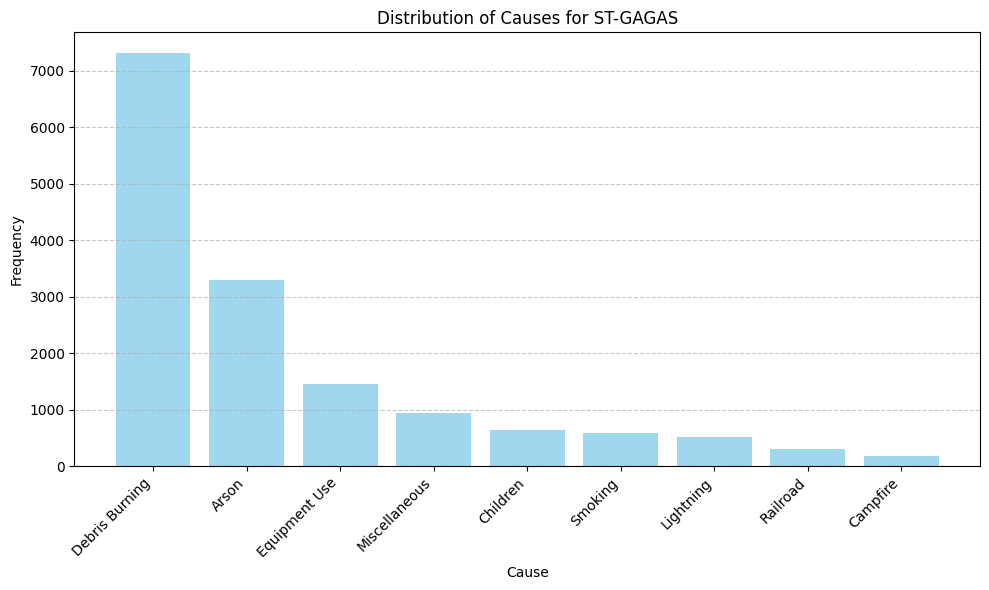

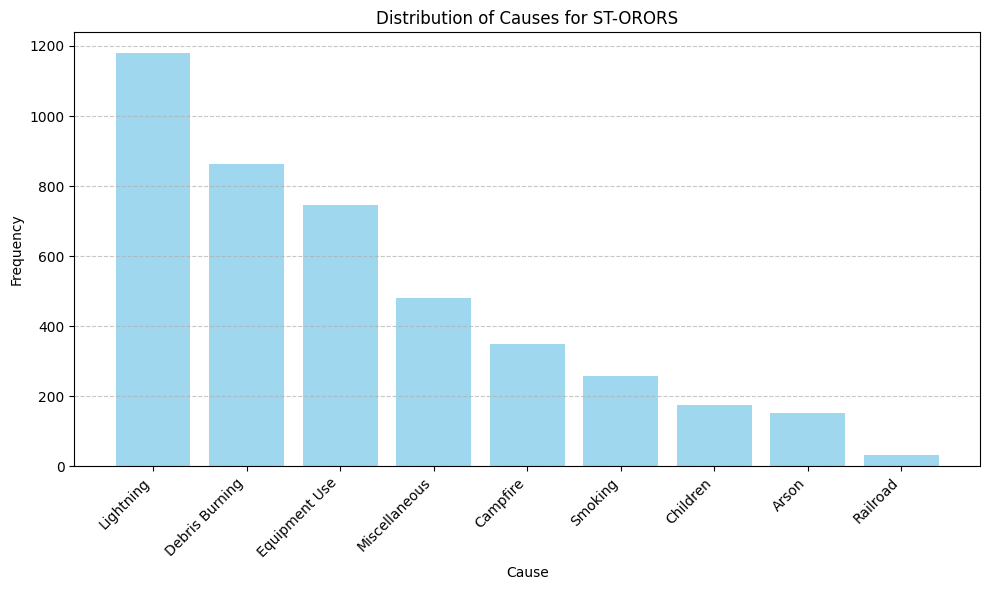

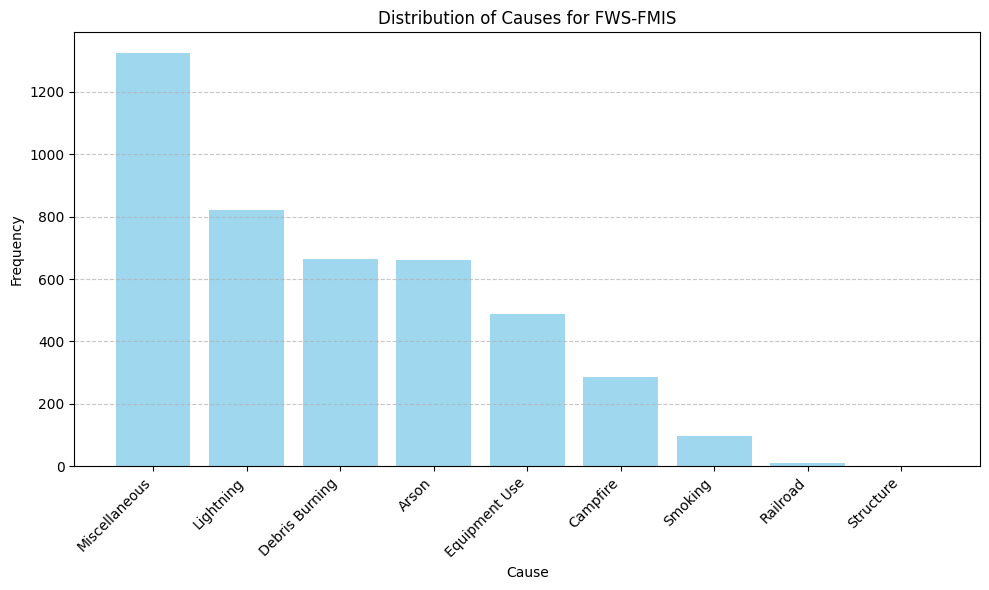

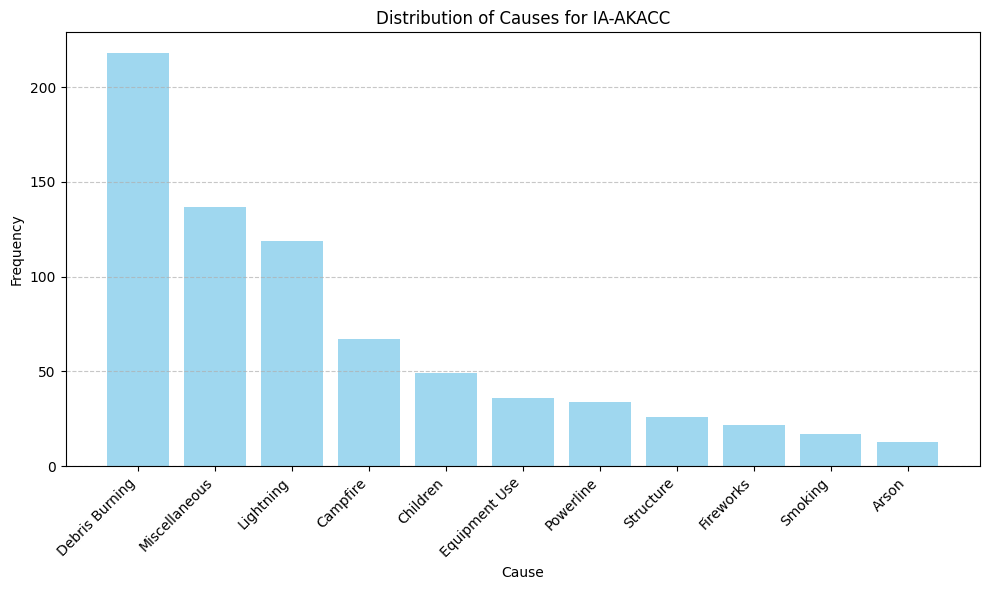

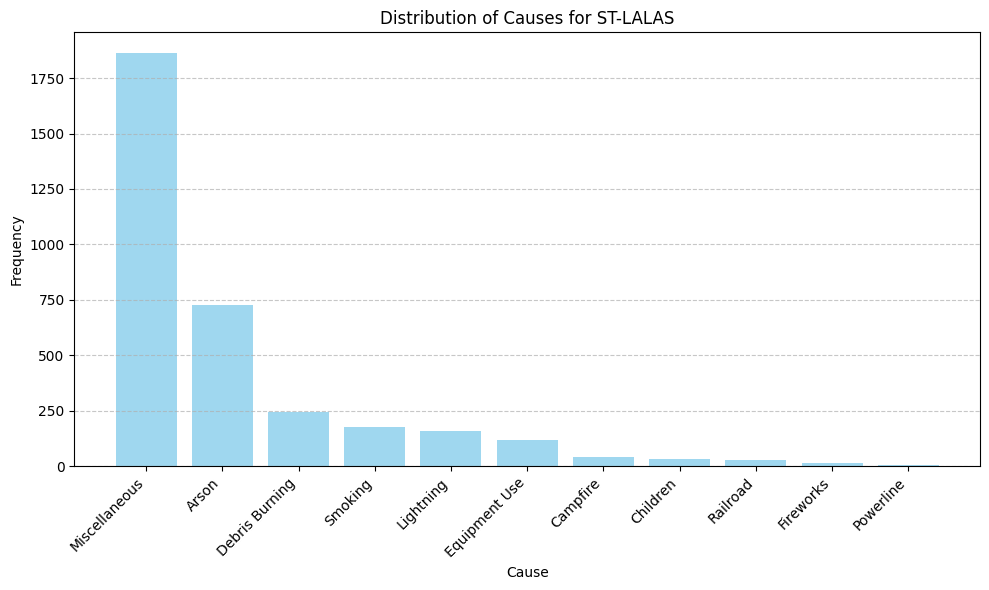

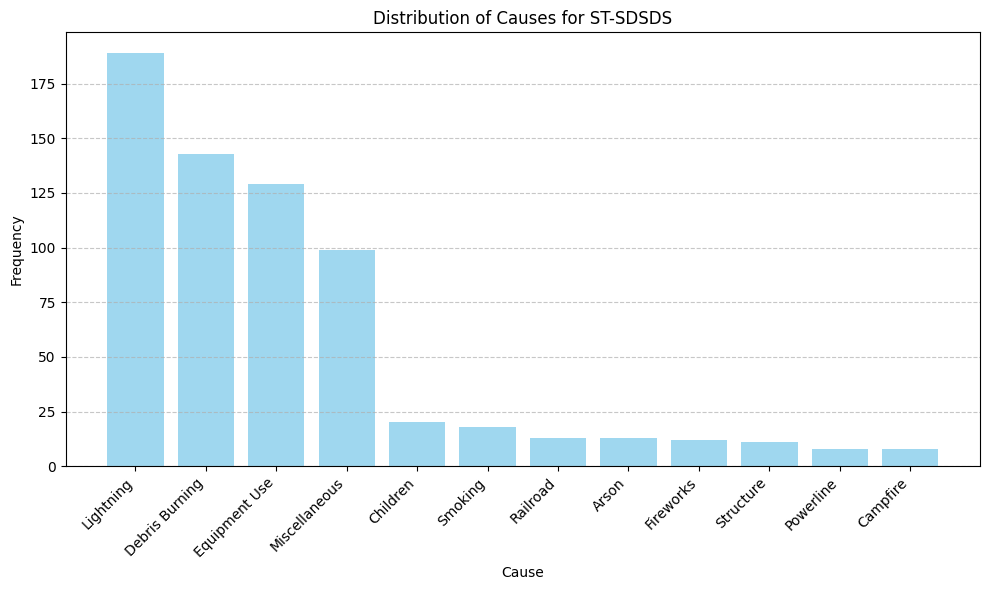

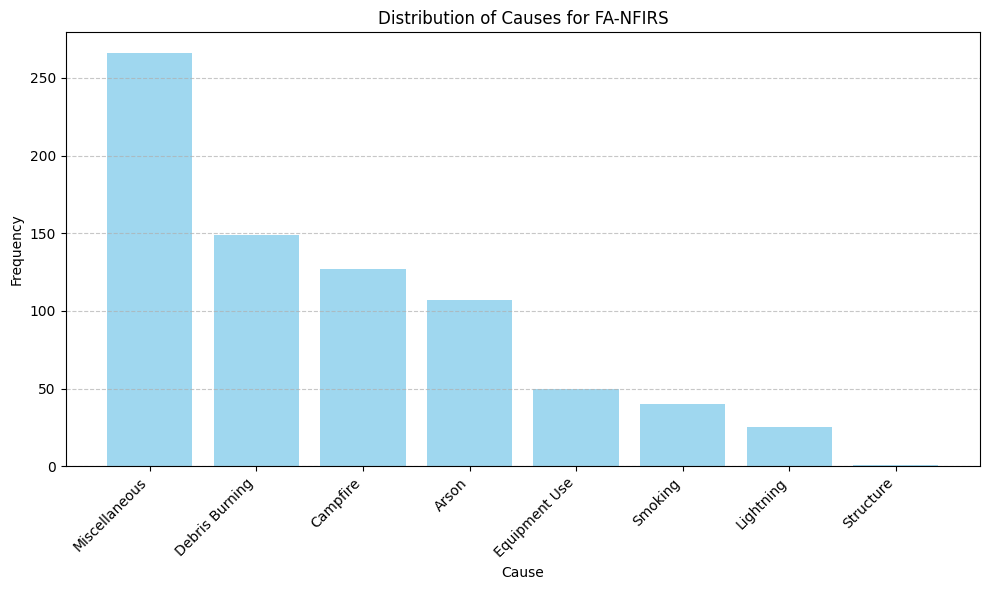

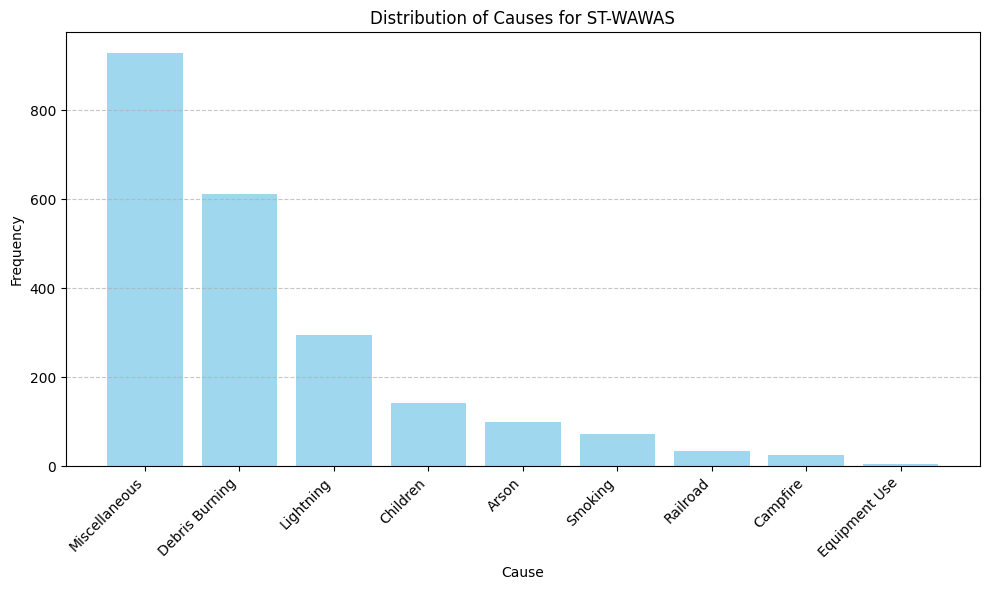

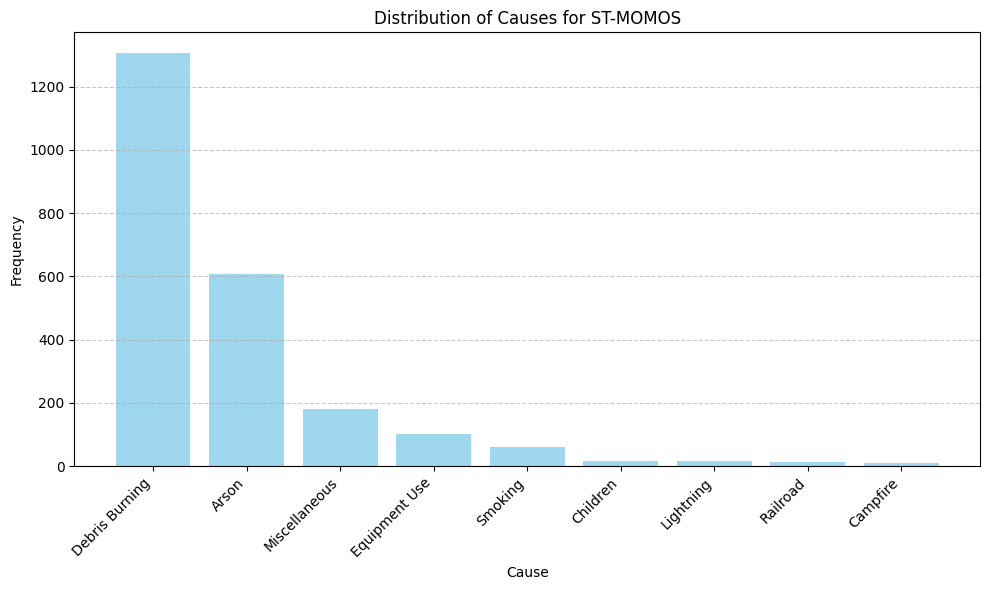

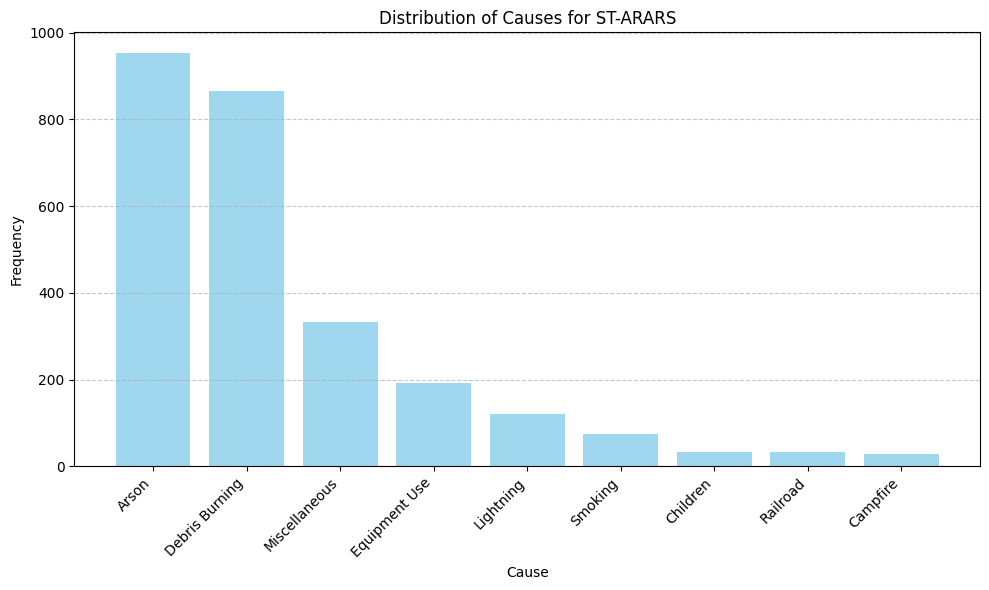

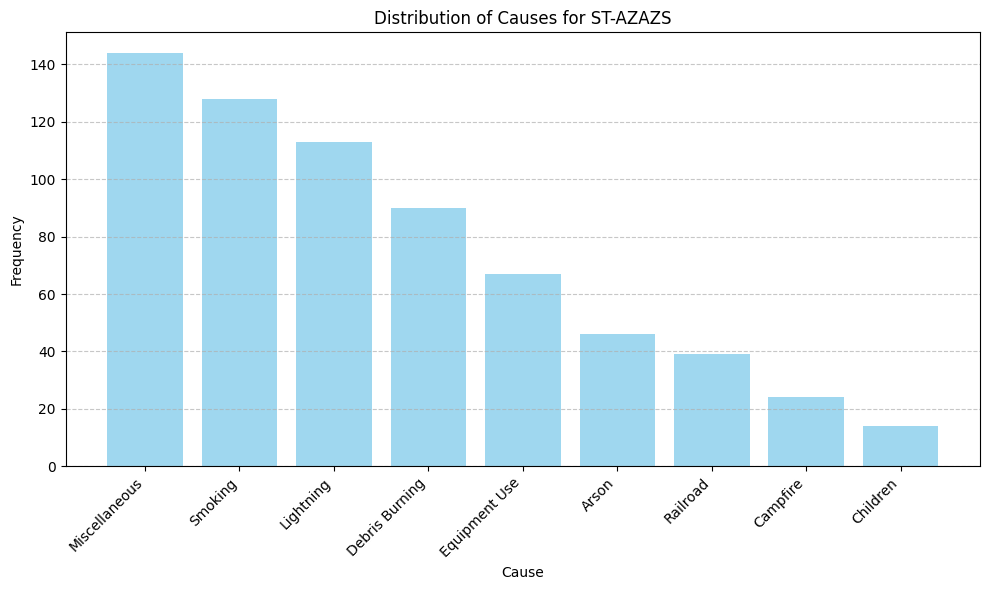

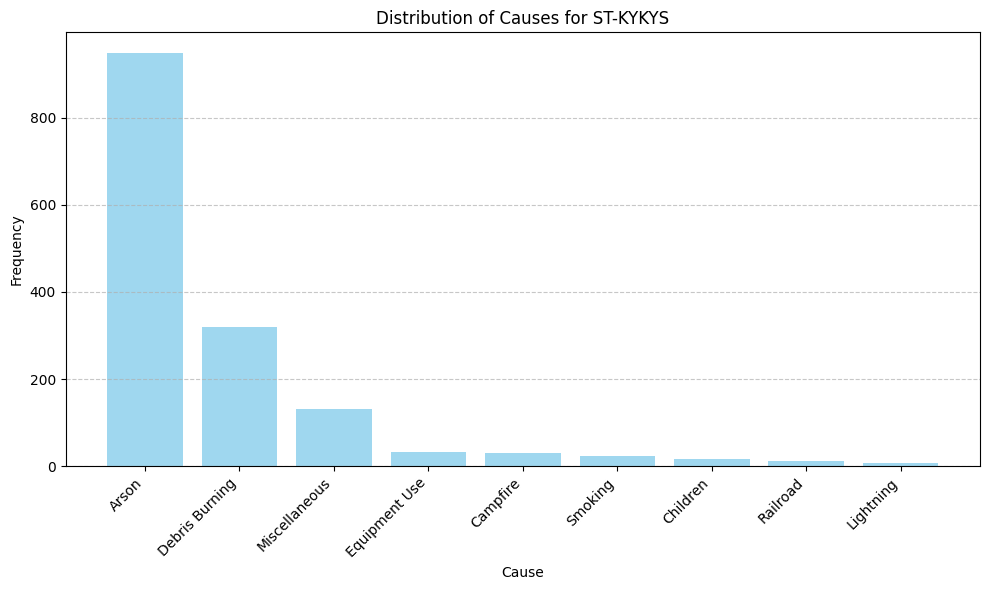

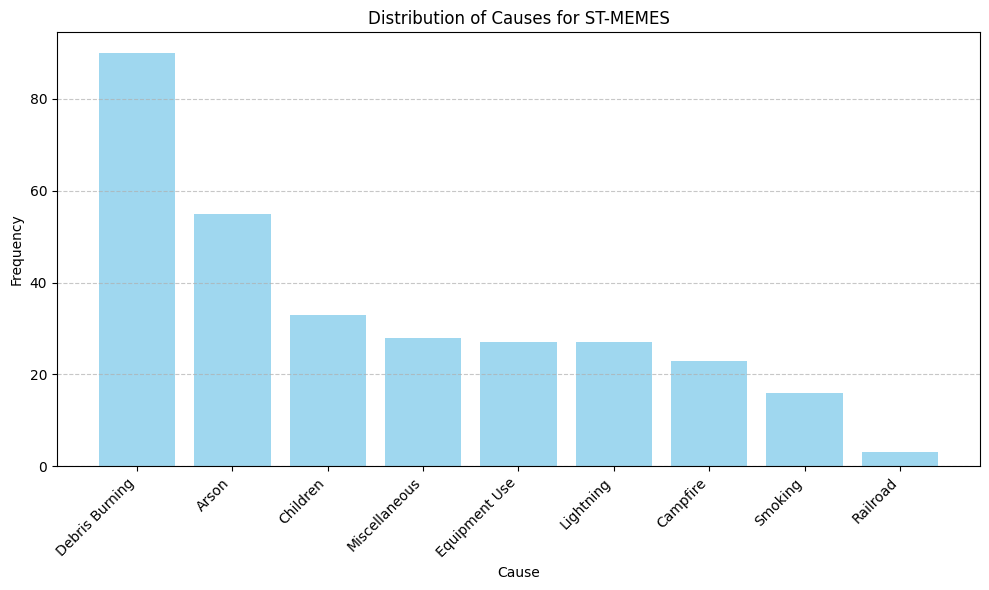

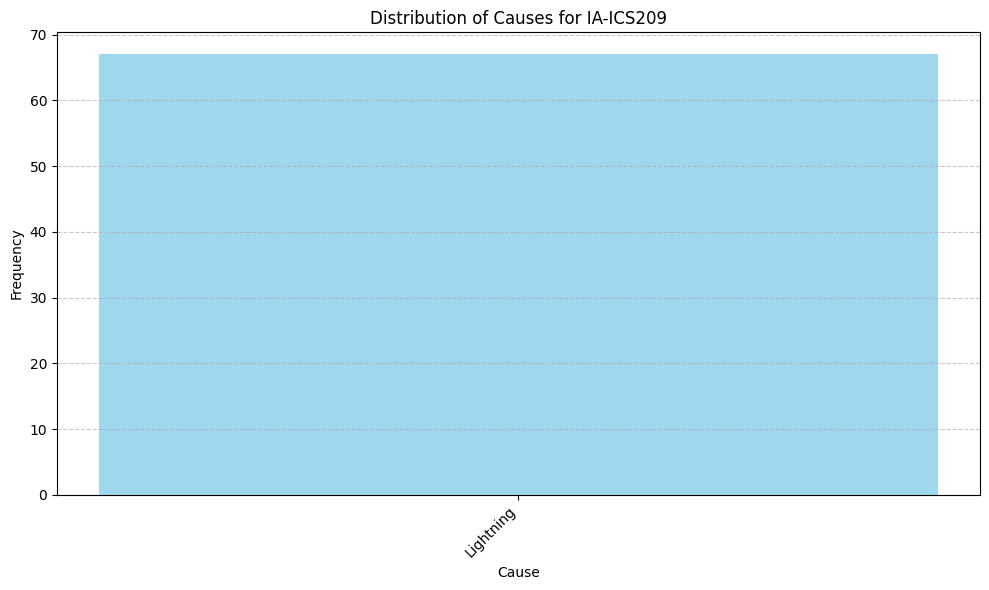

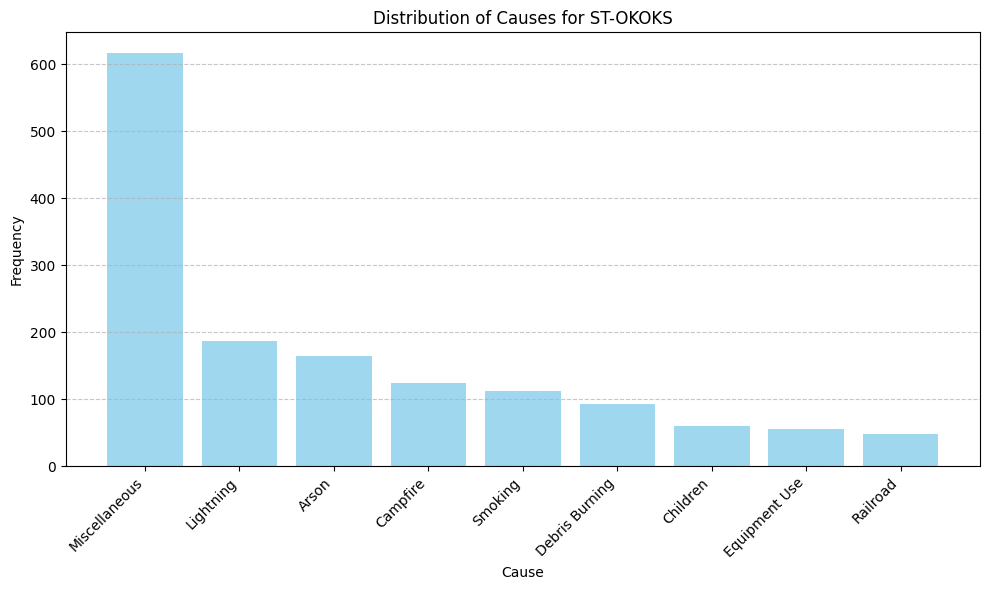

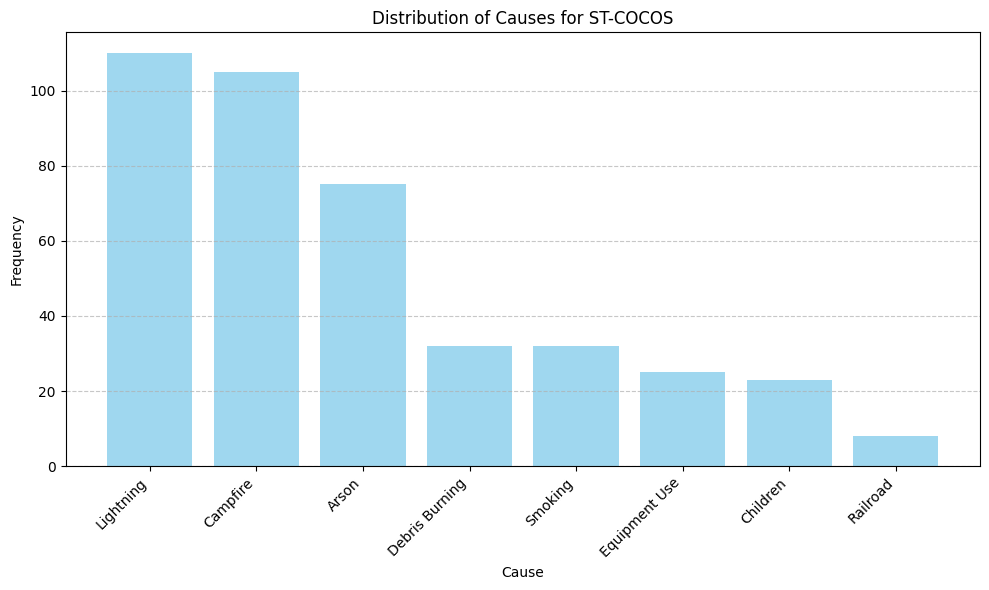

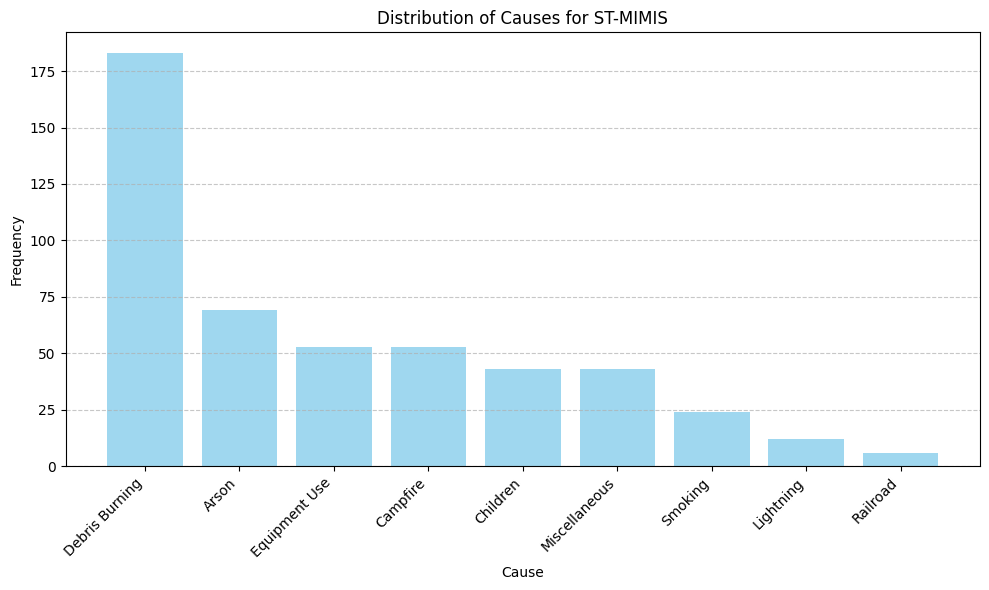

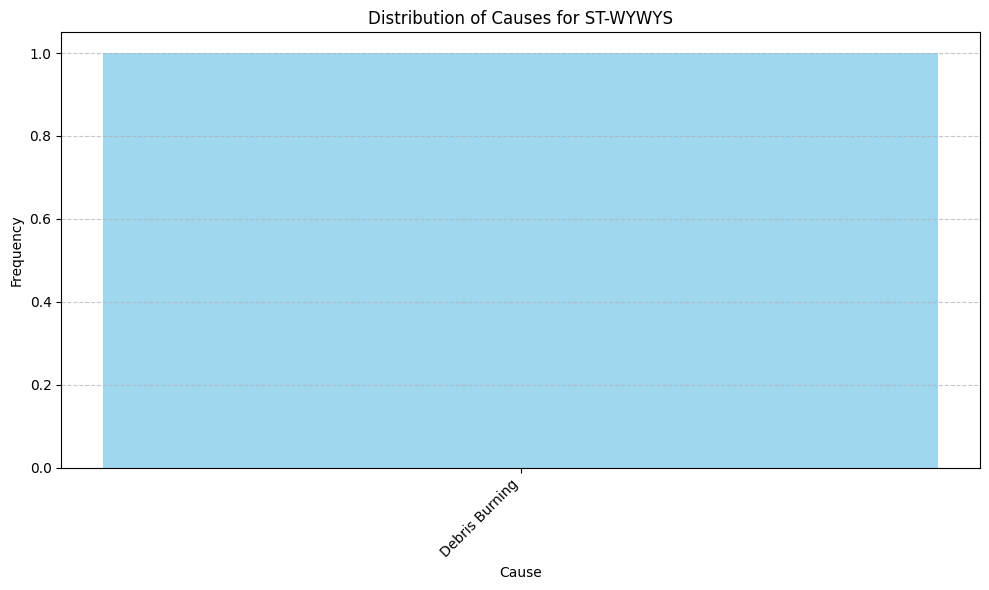

In [7]:
def dist_agency_frequency_cause(df, agency,titles):
    """
    Count the occurrences of each 'STAT_CAUSE_DESCR' category for a specific agency in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - agency: Name of the agency for which to count the occurrences.

    Returns:
    - freq_count: A pandas Series containing the frequency counts of each 'STAT_CAUSE_DESCR' category.
    """

    # Filter the DataFrame for the specific agency
    agency_df = df[df[titles] == agency]  # Replace 'Agency_Column_Name' with the actual name of the column containing agency information

    # Count the occurrences of each 'STAT_CAUSE_DESCR' category
    freq_count = agency_df['STAT_CAUSE_DESCR'].value_counts()
    causes = freq_count.index
    frequencies = freq_count.values
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(causes, frequencies, color='skyblue', alpha=0.8)
    plt.title(f'Distribution of Causes for {agency}')
    plt.xlabel('Cause')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
agencies_title = 'NWCG_REPORTING_AGENCY'
agencies = data[agencies_title].unique()
source_sys_title = 'SOURCE_SYSTEM' 
source_sys = data[source_sys_title].unique()
# uncomment to create graphs

for agency in agencies:
    dist_agency_frequency_cause(data,agency,agencies_title)
for source in source_sys:
    dist_agency_frequency_cause(data,source,source_sys_title)


# Density graphs for DISCOVERY_HOUR  FIRE_YEAR HOURS_TO_CONTAIN

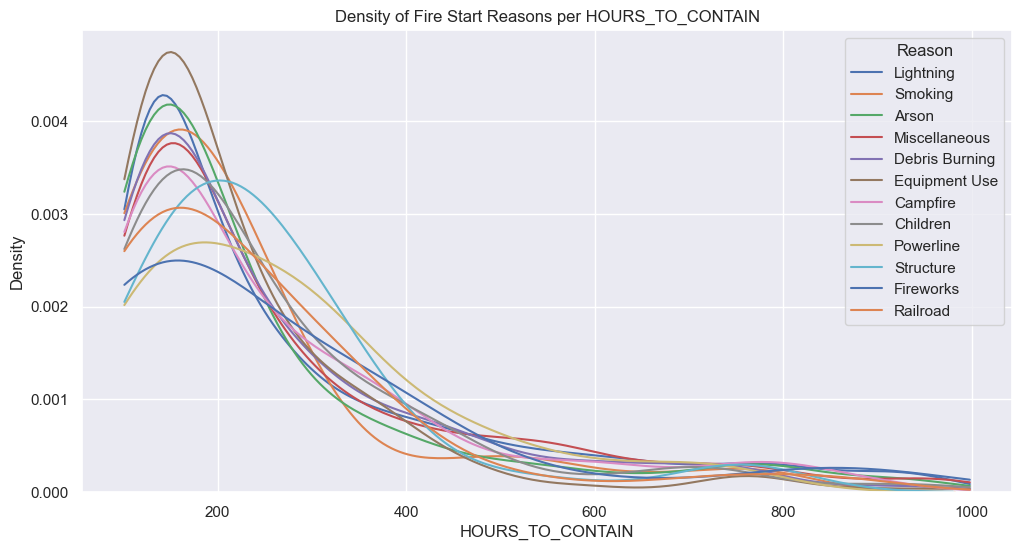

In [8]:
def density_graphs_for_feature_vs_reasons(df, col_name, upper_bound=10000, lower_bound=-10000):
    df = df[df[col_name] < upper_bound]
    df = df[df[col_name] > lower_bound]

    # Create a count plot for each reason per day
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    # Loop through each unique reason and create a density plot for each
    for reason in df['STAT_CAUSE_DESCR'].unique():
        sns.kdeplot(df[df['STAT_CAUSE_DESCR'] == reason][col_name], label=reason,
                    shade=False, clip=(df[col_name].min(), df[col_name].max()))

    plt.title('Density of Fire Start Reasons per ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('Density')
    plt.legend(title='Reason')
    plt.show()

# density_graphs_for_feature_vs_reasons(data, 'DISCOVERY_HOUR')
# density_graphs_for_feature_vs_reasons(data, 'discovery_month')
# density_graphs_for_feature_vs_reasons(data, 'FIRE_YEAR')
# density_graphs_for_feature_vs_reasons(data, 'HOURS_TO_CONTAIN')
density_graphs_for_feature_vs_reasons(data, 'HOURS_TO_CONTAIN',upper_bound =1000,lower_bound =100)


# Creating normalized matrix

conditional m.g.f for: DISCOVERY_HOUR_BIN_10-16
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.248265
Miscellaneous     0.197888
Arson             0.171113
Lightning         0.145526
Equipment Use     0.093551
Children          0.039333
Campfire          0.033917
Smoking           0.031527
Railroad          0.022656
Powerline         0.007609
Fireworks         0.006541
Structure         0.002074
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Debris Burning    0.257304
Lightning         0.206334
Miscellaneous     0.169037
Arson             0.144045
Campfire          0.070048
Equipment Use     0.068229
Smoking           0.028715
Children          0.025962
Railroad          0.010980
Powerline         0.009595
Fireworks         0.007499
Structure         0.002252
Name: proportion, dtype: float64


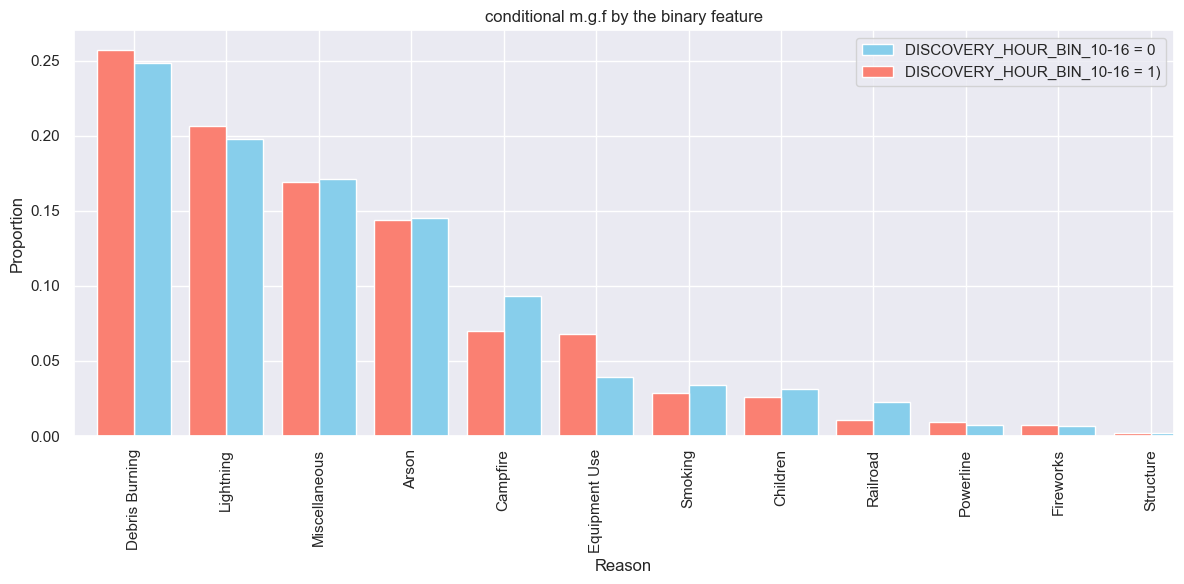

conditional m.g.f for: DISCOVERY_HOUR_BIN_16-22
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.267790
Miscellaneous     0.191726
Arson             0.161243
Lightning         0.134342
Equipment Use     0.095778
Campfire          0.044923
Children          0.034624
Smoking           0.032273
Railroad          0.021786
Powerline         0.008270
Fireworks         0.005242
Structure         0.002004
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Lightning         0.284289
Miscellaneous     0.180421
Debris Burning    0.179534
Arson             0.171969
Equipment Use     0.046018
Campfire          0.041923
Children          0.039053
Smoking           0.024144
Fireworks         0.013461
Railroad          0.008739
Powerline         0.007813
Structure         0.002635
Name: proportion, dtype: float64


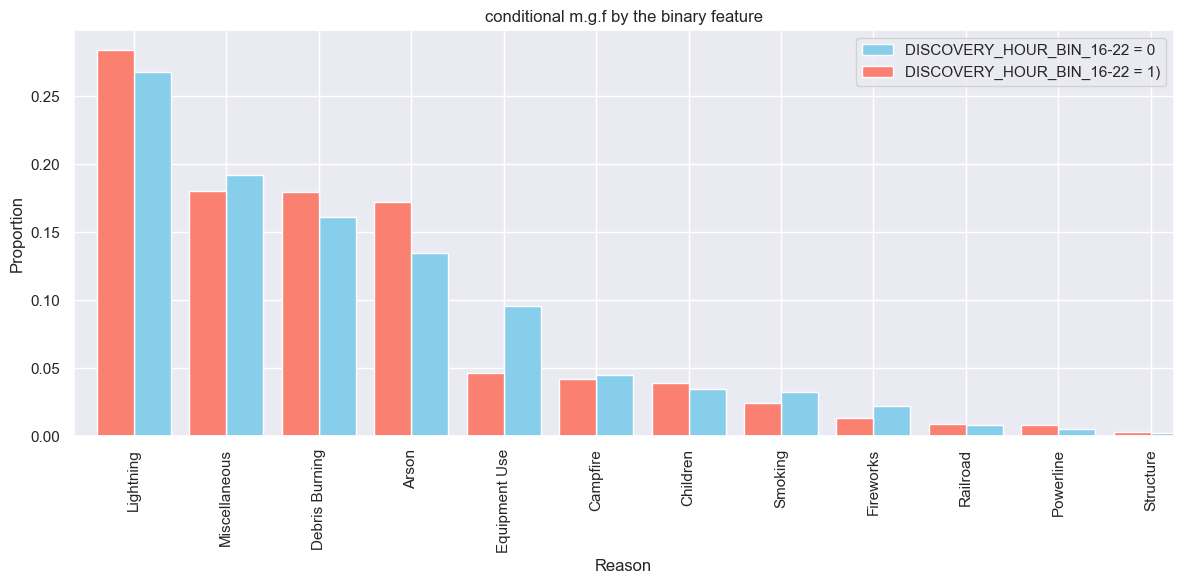

conditional m.g.f for: DISCOVERY_HOUR_BIN_4-10
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.257570
Miscellaneous     0.190193
Arson             0.164593
Lightning         0.153724
Equipment Use     0.087757
Campfire          0.041822
Children          0.036274
Smoking           0.031028
Railroad          0.019869
Powerline         0.008207
Fireworks         0.006917
Structure         0.002047
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Lightning         0.381410
Miscellaneous     0.174767
Arson             0.133098
Campfire          0.103291
Debris Burning    0.094653
Equipment Use     0.050855
Smoking           0.023420
Children          0.016789
Powerline         0.007604
Railroad          0.005657
Fireworks         0.004501
Structure         0.003954
Name: proportion, dtype: float64


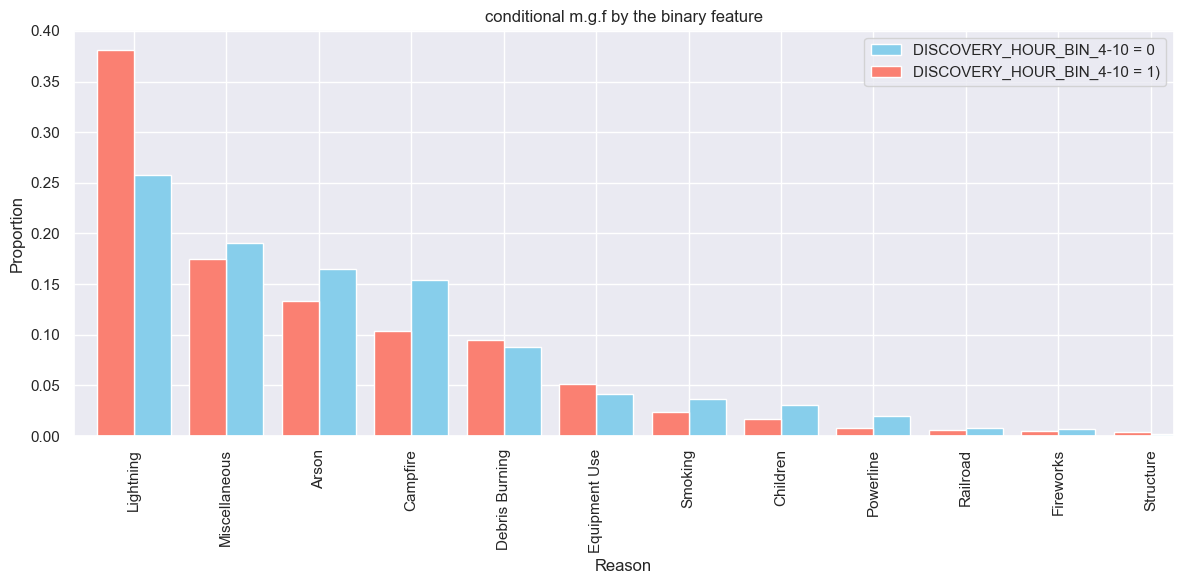

conditional m.g.f for: DISCOVERY_HOUR_BIN_22-4
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Lightning         0.248785
Debris Burning    0.215901
Miscellaneous     0.173673
Arson             0.153446
Campfire          0.062330
Equipment Use     0.058696
Children          0.030051
Smoking           0.026618
Railroad          0.009737
Fireworks         0.009454
Powerline         0.008783
Structure         0.002527
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Debris Burning    0.288985
Miscellaneous     0.206870
Arson             0.174035
Equipment Use     0.116255
Lightning         0.069692
Children          0.041381
Smoking           0.035180
Railroad          0.029689
Campfire          0.024753
Powerline         0.007528
Fireworks         0.003944
Structure         0.001687
Name: proportion, dtype: float64


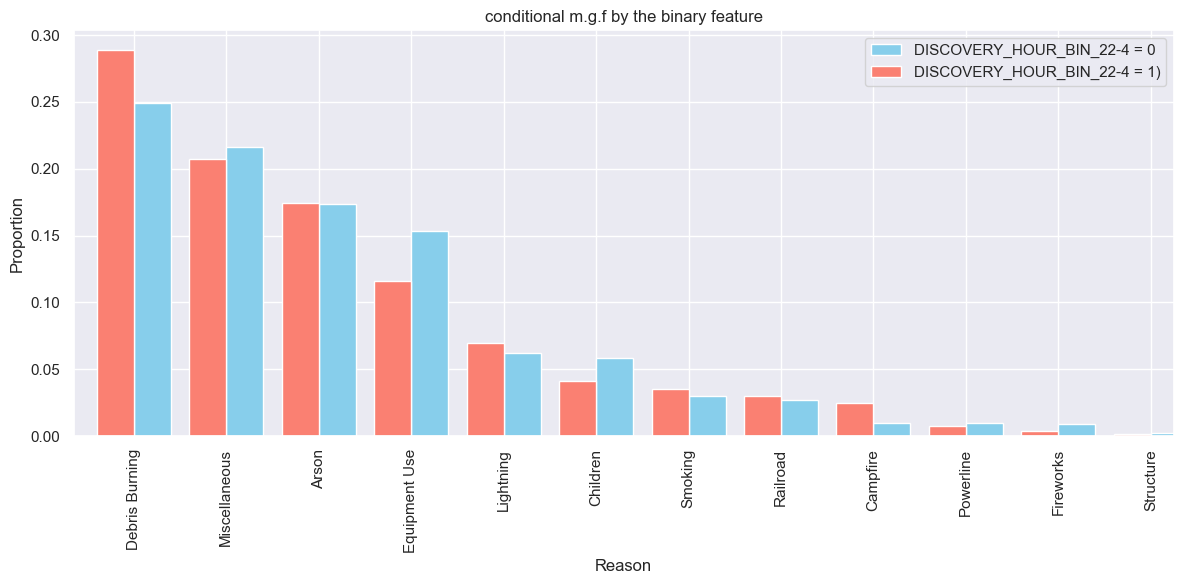

conditional m.g.f for: is_weekend
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.250246
Miscellaneous     0.188207
Lightning         0.169851
Arson             0.161106
Equipment Use     0.090787
Campfire          0.037942
Children          0.033507
Smoking           0.030787
Railroad          0.020187
Powerline         0.008575
Fireworks         0.006626
Structure         0.002180
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Debris Burning    0.252307
Miscellaneous     0.192641
Arson             0.168295
Lightning         0.147655
Equipment Use     0.075881
Campfire          0.058946
Children          0.039953
Smoking           0.030551
Railroad          0.017230
Powerline         0.007287
Fireworks         0.007254
Structure         0.002000
Name: proportion, dtype: float64


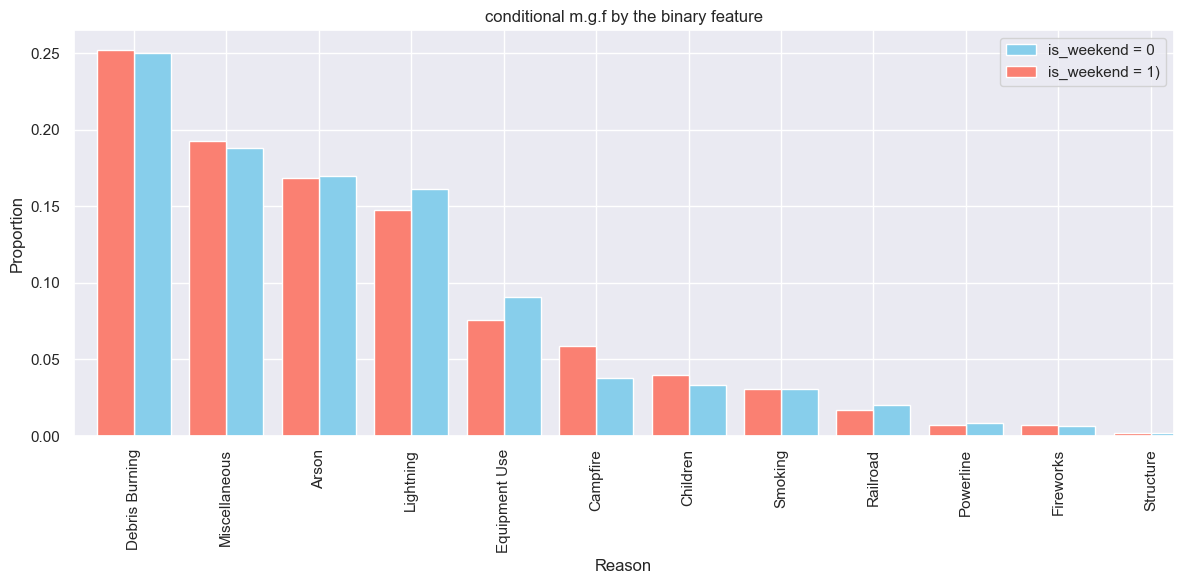

conditional m.g.f for: is_holiday
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.251555
Miscellaneous     0.188561
Lightning         0.164769
Arson             0.163318
Equipment Use     0.086480
Campfire          0.043846
Children          0.035193
Smoking           0.030732
Railroad          0.019397
Powerline         0.008204
Fireworks         0.005820
Structure         0.002127
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Miscellaneous     0.226027
Debris Burning    0.226027
Arson             0.162601
Lightning         0.101426
Equipment Use     0.077500
Campfire          0.062676
Children          0.045693
Fireworks         0.043254
Smoking           0.030118
Railroad          0.015200
Powerline         0.007412
Structure         0.002064
Name: proportion, dtype: float64


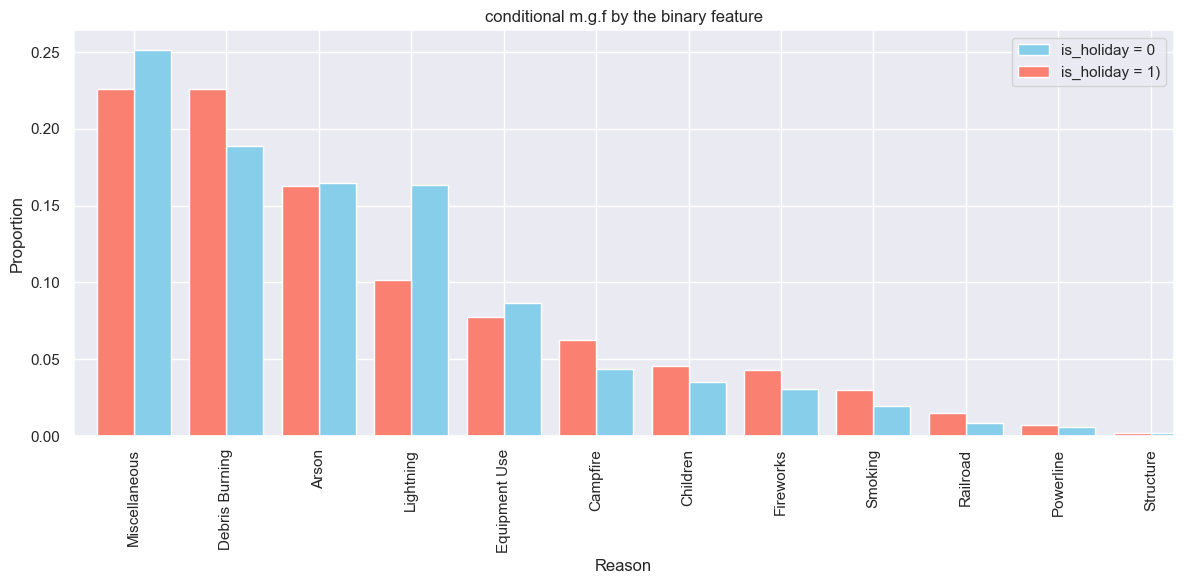

conditional m.g.f for: is_week_before_or_after_july_4
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.251491
Miscellaneous     0.189748
Arson             0.163674
Lightning         0.161835
Equipment Use     0.086300
Campfire          0.044365
Children          0.035507
Smoking           0.030739
Railroad          0.019312
Powerline         0.008201
Fireworks         0.006704
Structure         0.002124
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Lightning         0.550273
Miscellaneous     0.130943
Equipment Use     0.067810
Debris Burning    0.059236
Arson             0.046765
Fireworks         0.042089
Campfire          0.038971
Children          0.024942
Smoking           0.023383
Railroad          0.010912
Structure         0.002338
Powerline         0.002338
Name: proportion, dtype: float64


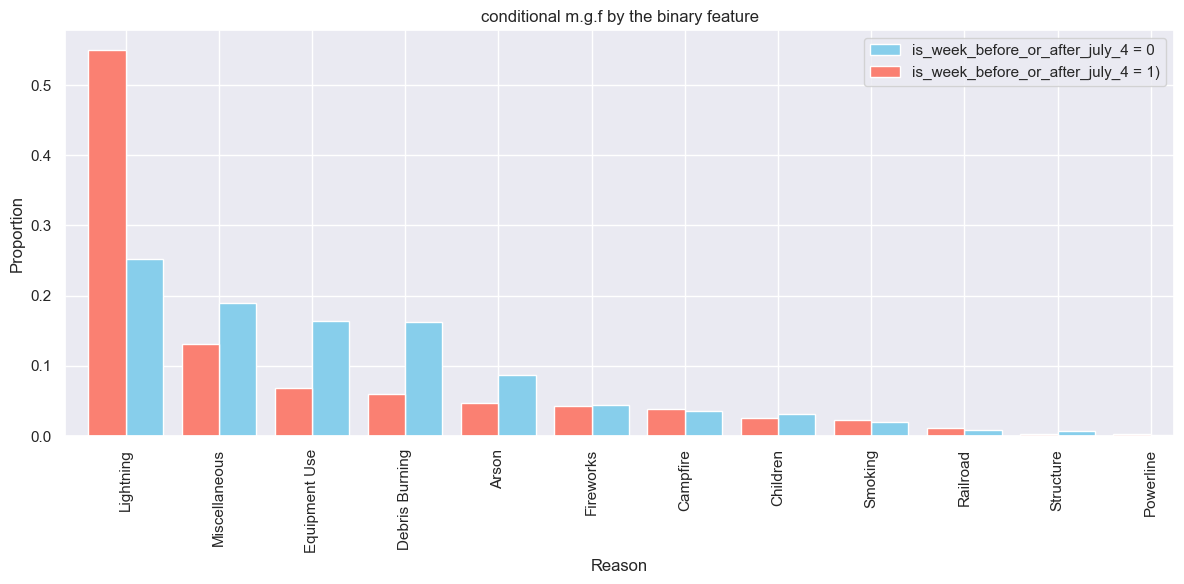

conditional m.g.f for: is_june_to_september
Reason distribution for weekdays (is_weekend = 0):
STAT_CAUSE_DESCR
Debris Burning    0.338095
Arson             0.209331
Miscellaneous     0.194453
Equipment Use     0.077802
Children          0.040914
Campfire          0.039099
Smoking           0.032246
Lightning         0.031500
Railroad          0.024230
Powerline         0.007983
Structure         0.002294
Fireworks         0.002052
Name: proportion, dtype: float64

Reason distribution for weekends (is_weekend = 1):
STAT_CAUSE_DESCR
Lightning         0.359942
Miscellaneous     0.182236
Debris Burning    0.120382
Equipment Use     0.098866
Arson             0.094429
Campfire          0.052200
Smoking           0.028425
Children          0.027333
Fireworks         0.013947
Railroad          0.011888
Powerline         0.008481
Structure         0.001872
Name: proportion, dtype: float64


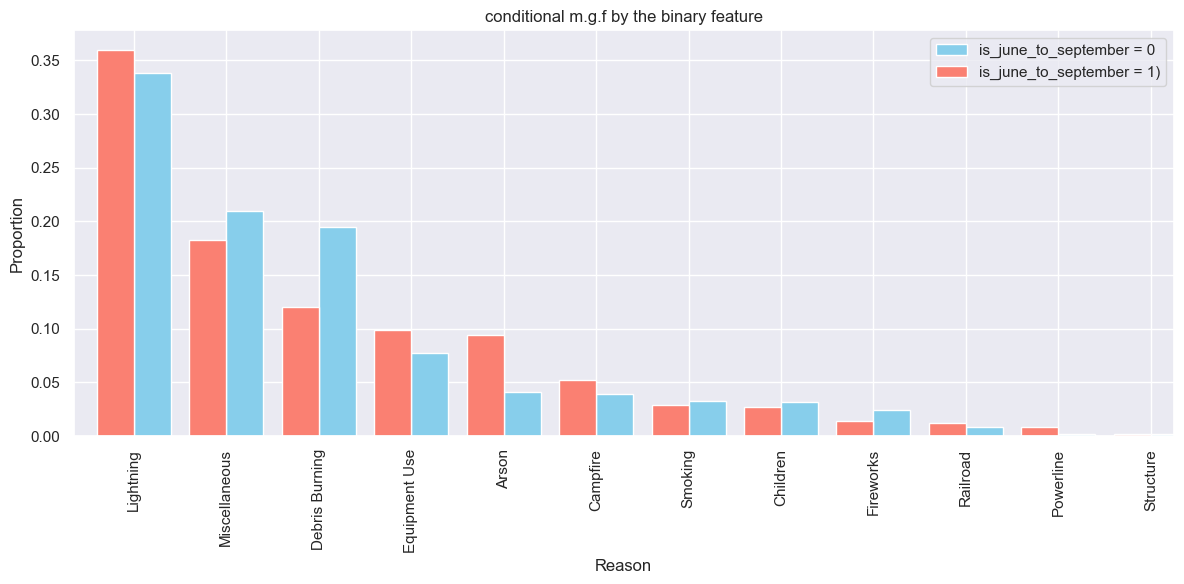

In [9]:
def create_normalized_matrix(df, binary_feature):
    print('conditional m.g.f for: '+ binary_feature) 
    reason_distribution_weekday = data[data[binary_feature] == 0]['STAT_CAUSE_DESCR'].value_counts(normalize=True)

    # Calculate the distribution of reasons when is_weekend is 1
    reason_distribution_weekend = data[data[binary_feature] == 1]['STAT_CAUSE_DESCR'].value_counts(normalize=True)

    # Calculate the distribution of reasons when is_weekend is 0
    reason_distribution_weekday = data[data[binary_feature] == 0]['STAT_CAUSE_DESCR'].value_counts(normalize=True)

    # Calculate the distribution of reasons when is_weekend is 1
    reason_distribution_weekend = data[data[binary_feature] == 1]['STAT_CAUSE_DESCR'].value_counts(normalize=True)

    # Display the distributions
    print("Reason distribution for weekdays (is_weekend = 0):")
    print(reason_distribution_weekday)
    print("\nReason distribution for weekends (is_weekend = 1):")
    print(reason_distribution_weekend)
    reason_distribution = pd.concat([reason_distribution_weekday, reason_distribution_weekend], axis=1)
    reason_distribution.columns = ['Weekday', 'Weekend']

    # Display the concatenated data
    #print(reason_distribution)


    # Create bar plots for each distribution
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot reason distribution for weekdays (is_weekend = 0)
    reason_distribution_weekday.plot(kind='bar', ax=ax, position=0, width=0.4, color='skyblue', label=binary_feature+' = 0')

    # Plot reason distribution for weekends (is_weekend = 1)
    reason_distribution_weekend.plot(kind='bar', ax=ax, position=1, width=0.4, color='salmon', label=binary_feature+' = 1)')

    # Set plot title and labels
    ax.set_title('conditional m.g.f by the binary feature')
    ax.set_xlabel('Reason')
    ax.set_ylabel('Proportion')
    ax.legend()

    plt.tight_layout()
    plt.show()

# # Example usage

binary_features = ['DISCOVERY_HOUR_BIN_10-16', 'DISCOVERY_HOUR_BIN_16-22',
                   'DISCOVERY_HOUR_BIN_4-10','DISCOVERY_HOUR_BIN_22-4', 'is_weekend', 'is_holiday','is_week_before_or_after_july_4',
                  'is_june_to_september']

for f in binary_features:
    create_normalized_matrix(data, f)

# Plot of reason_probabilities

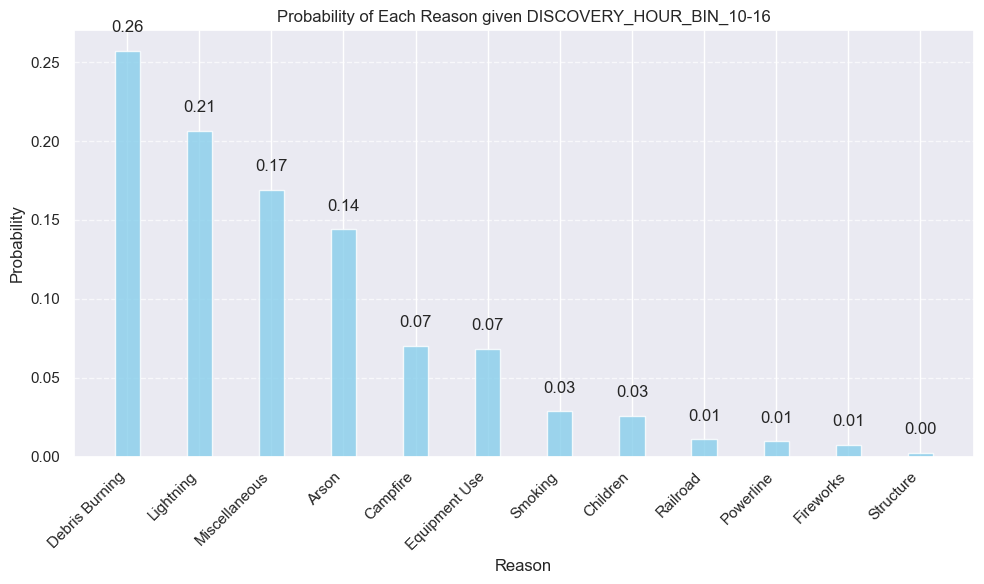

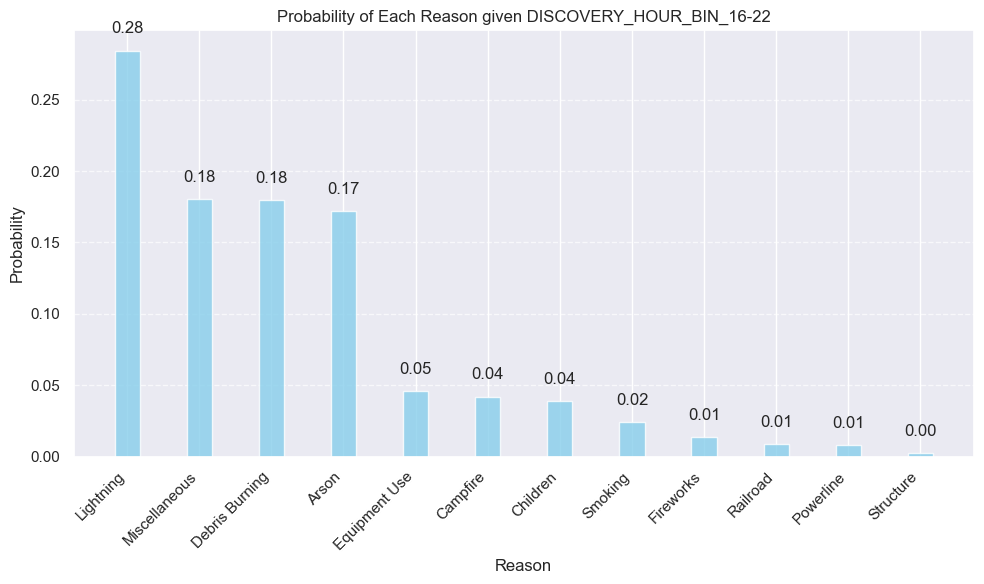

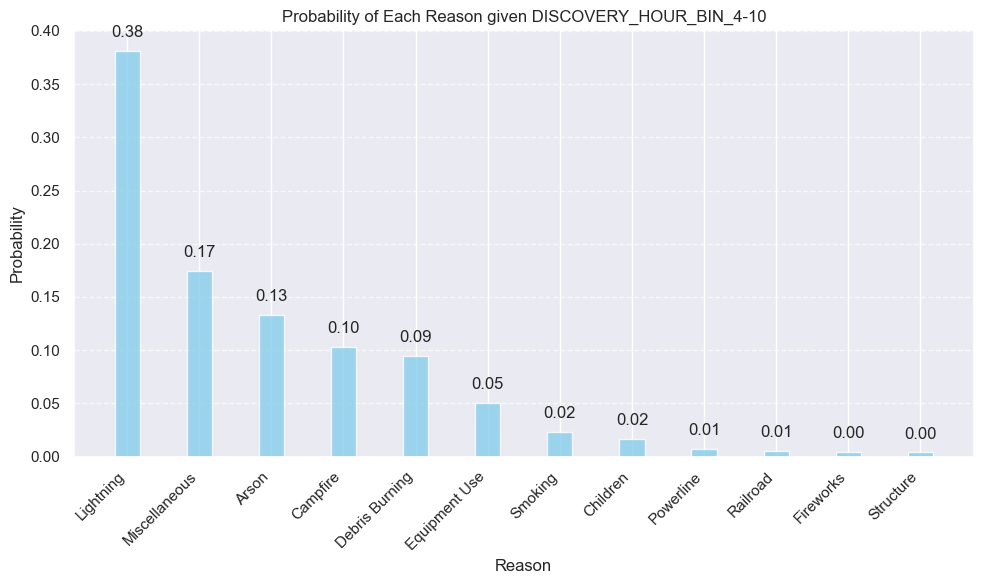

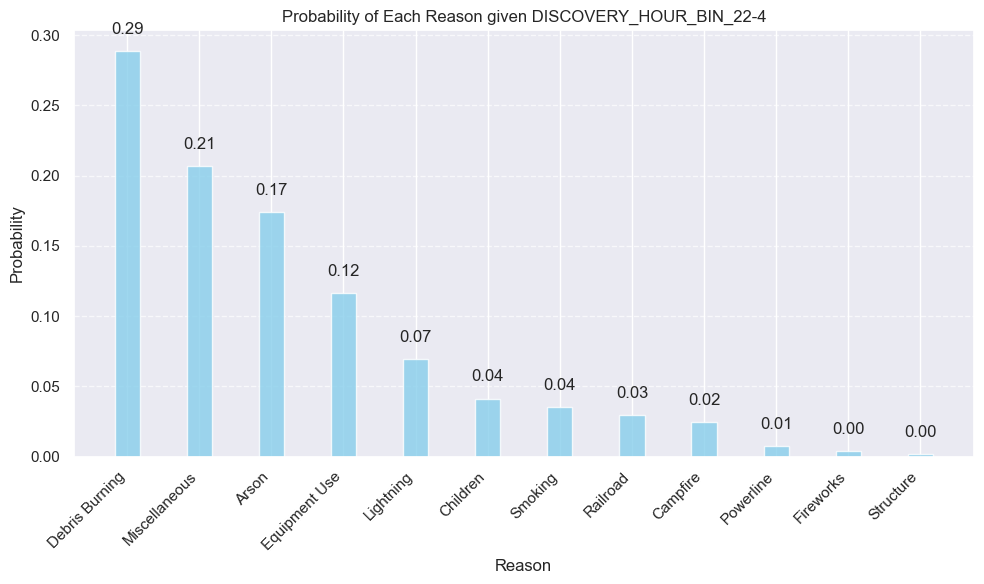

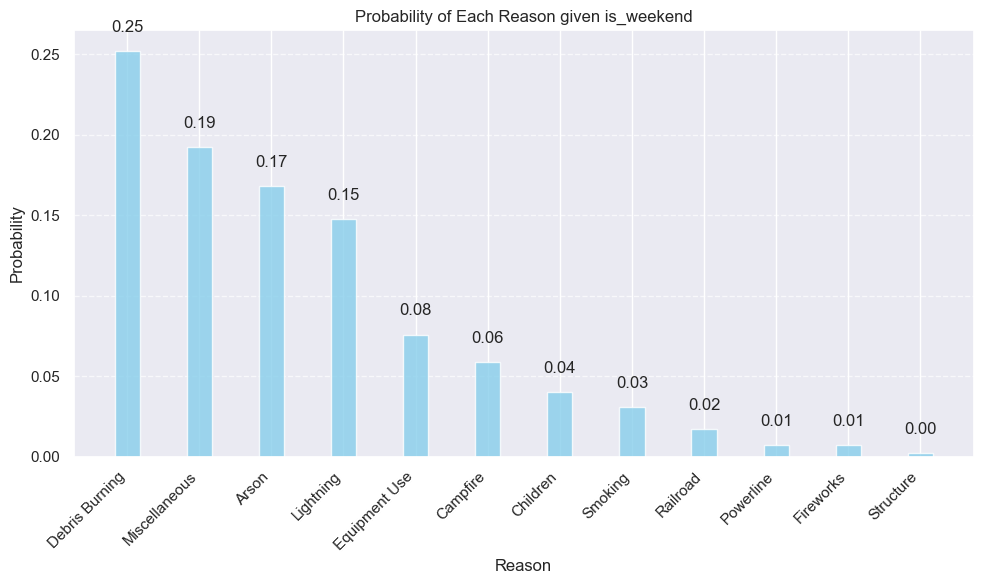

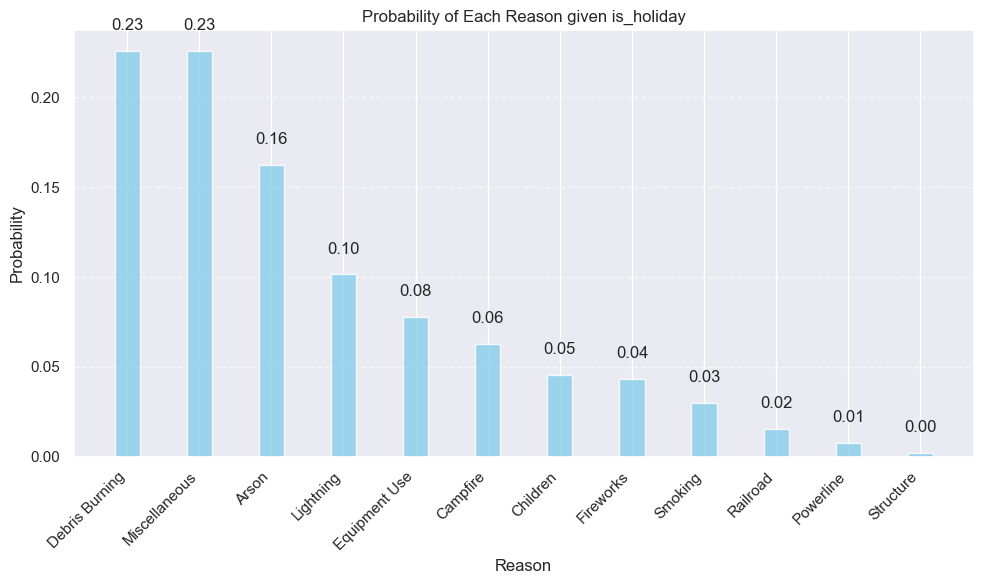

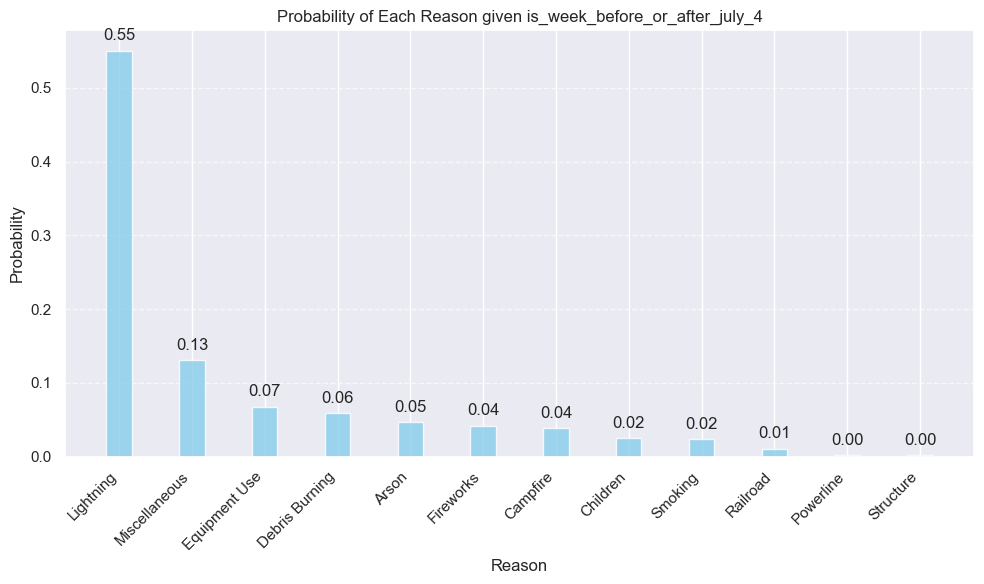

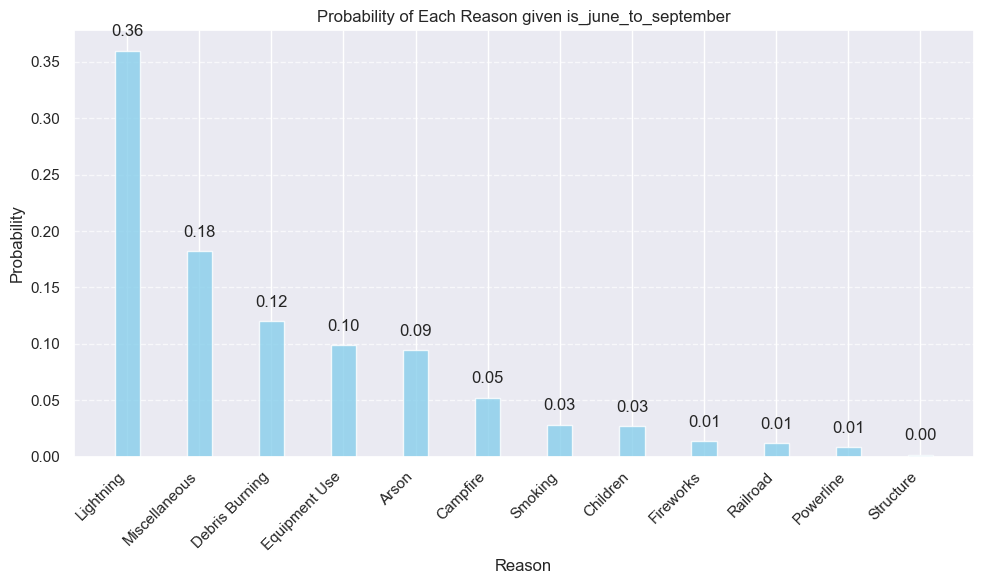

In [10]:
def plot_reason_probabilities(dataset, binary_feature_col):
    """
    Plots the probability of each reason given that the binary feature is 1.

    Parameters:
    - dataset: pandas DataFrame containing the dataset.
    - binary_feature_col: Name of the column containing the binary feature.
    """

    # Calculate probabilities for each reason given that binary feature is 1
    subset = dataset[dataset[binary_feature_col] == 1]
    reason_probs = (subset.groupby('STAT_CAUSE_DESCR')[binary_feature_col].count() / len(subset)).sort_values(ascending=False)

    # Get the x positions for the bars
    x = np.arange(len(reason_probs))

    # Define the width of each bar
    width = 0.35  

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot bars for probability of each reason given binary feature is 1
    bars1 = plt.bar(x, reason_probs, width, color='skyblue', alpha=0.8)

    # Add value labels above each bar
    for i, bar in enumerate(bars1):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                 '{:.2f}'.format(reason_probs[i]), ha='center', va='bottom')

    plt.title('Probability of Each Reason given {}'.format(binary_feature_col))
    plt.xlabel('Reason')
    plt.ylabel('Probability')
    plt.xticks(ticks=x, labels=reason_probs.index, rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Call the function for each binary feature
for f in binary_features:
    plot_reason_probabilities(data,f)

# Fireworks distribution

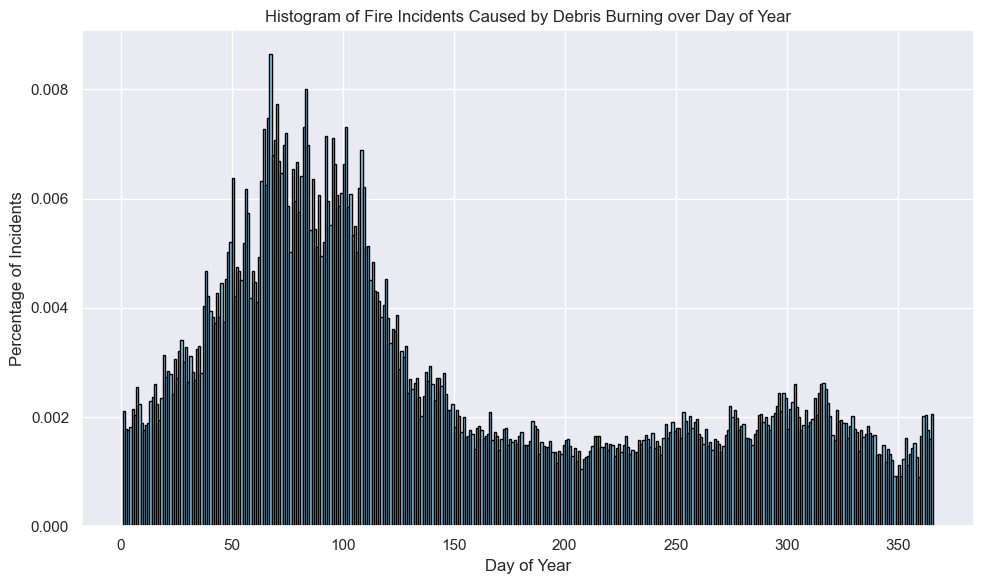

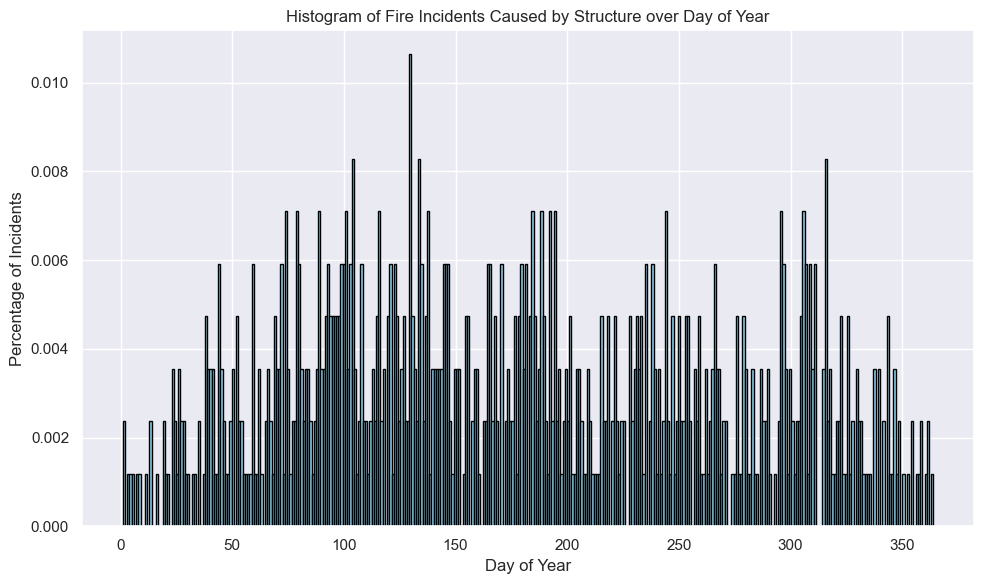

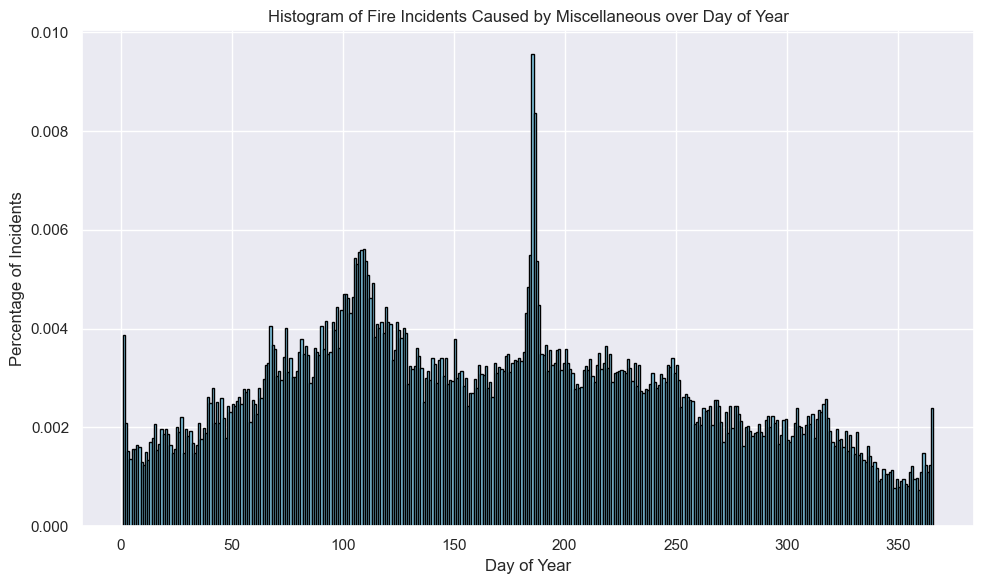

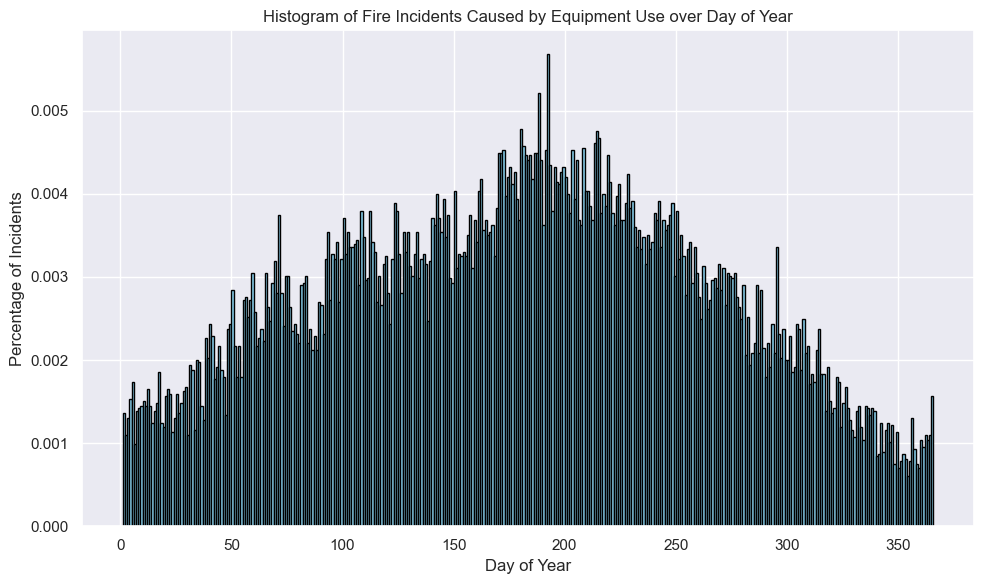

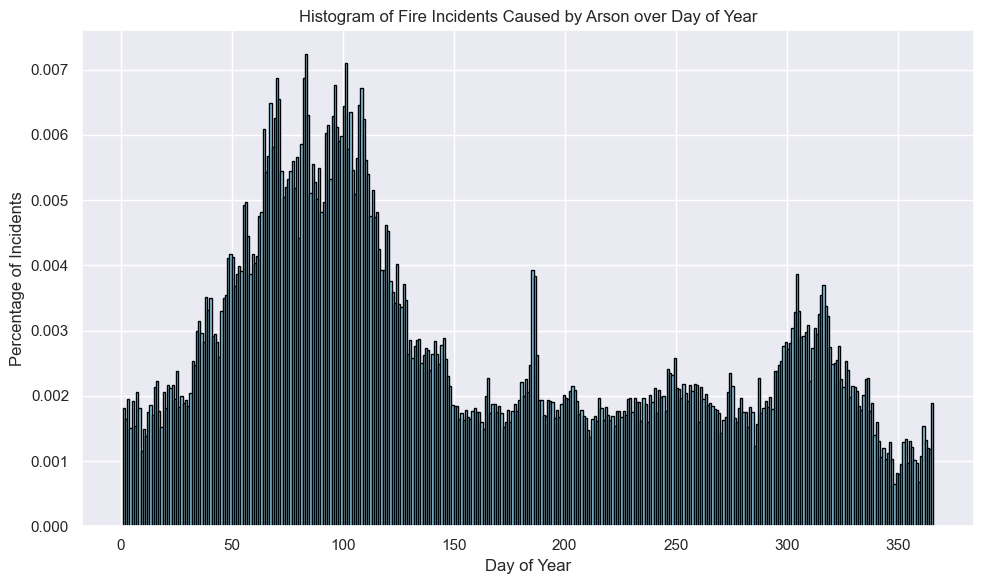

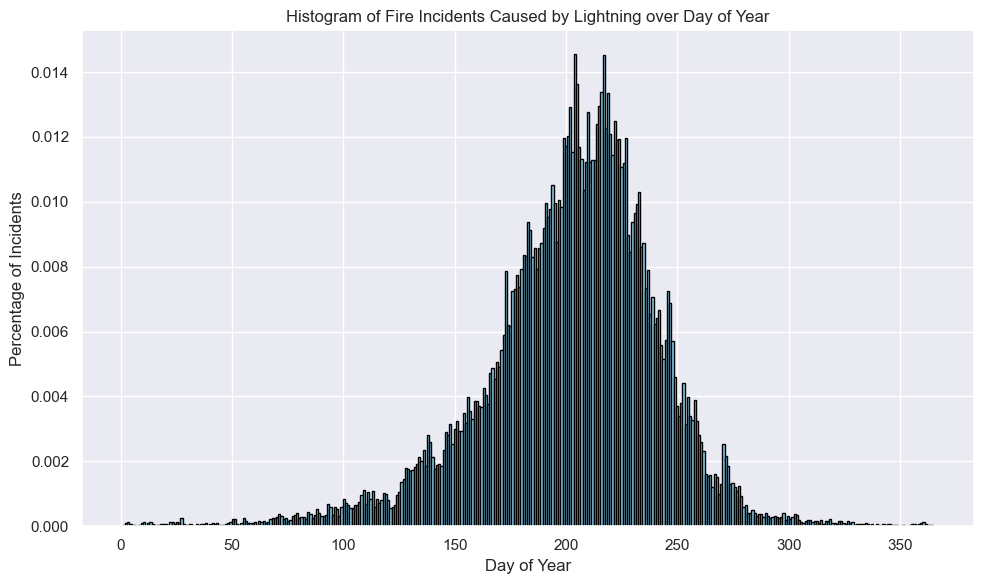

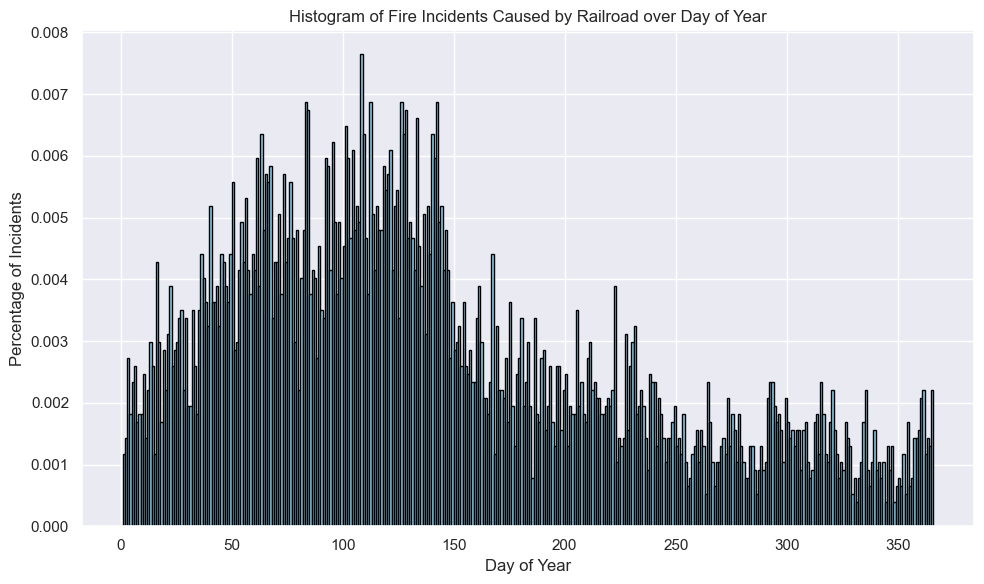

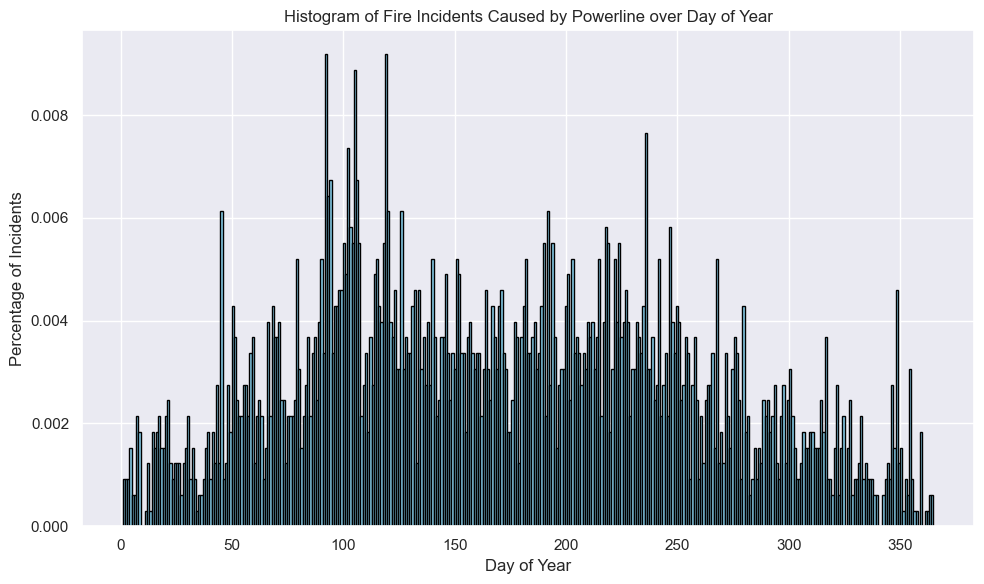

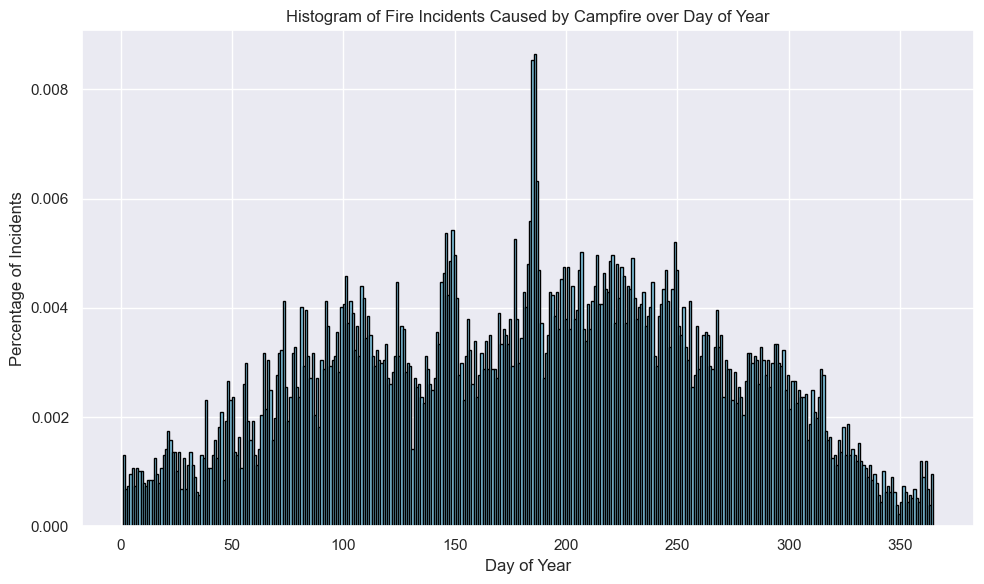

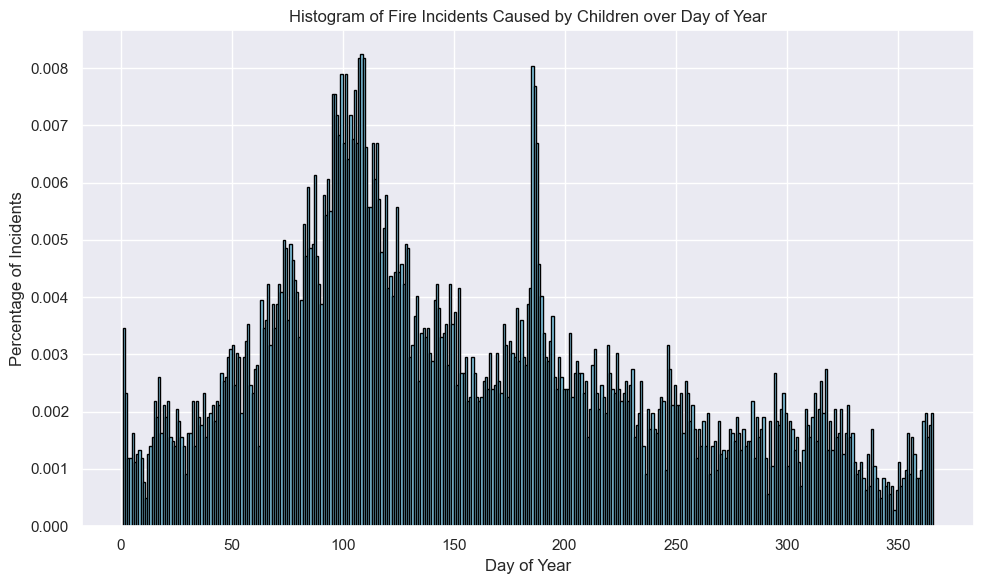

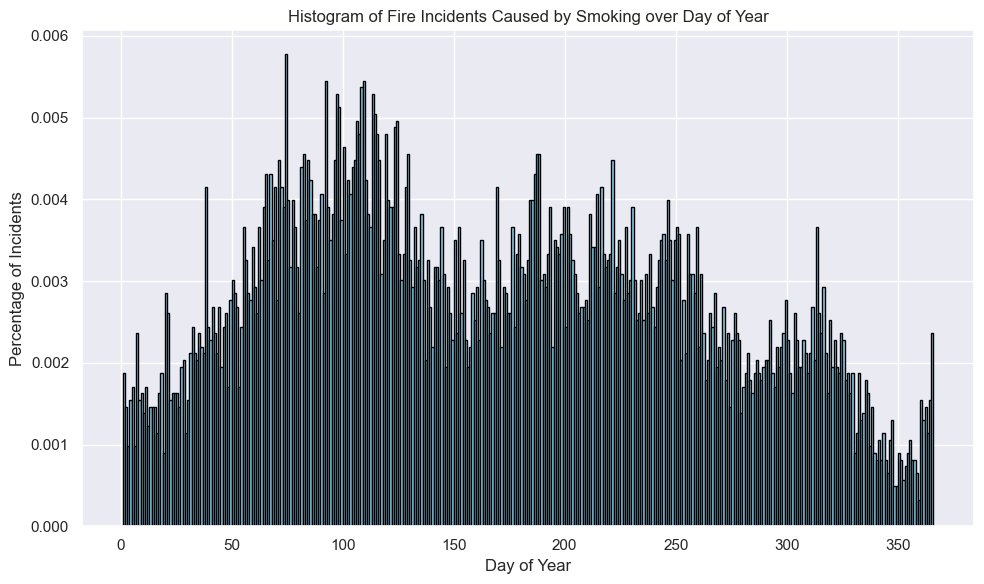

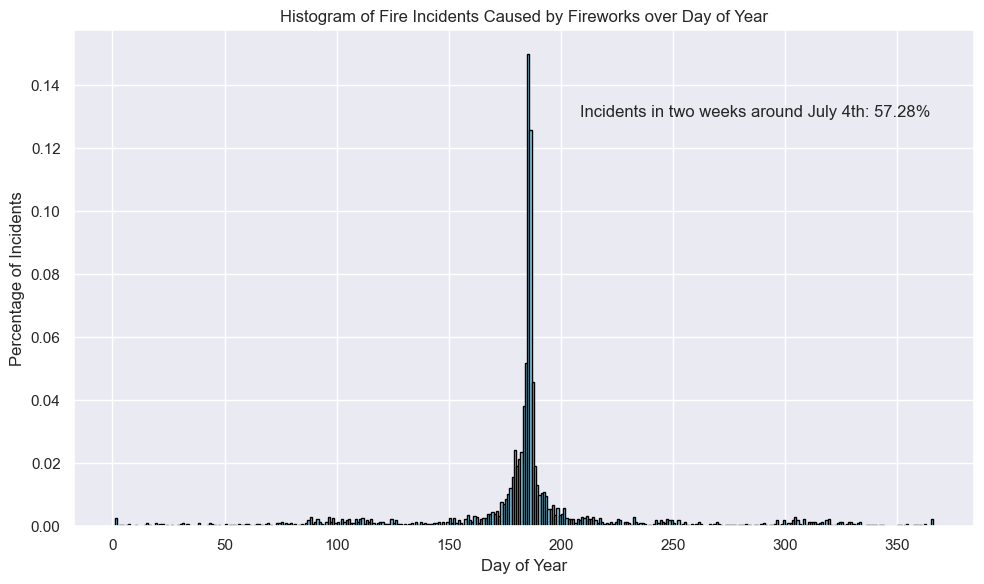

In [11]:
def histogram_cause_per_day(data):
    for cause in data['STAT_CAUSE_DESCR'].unique():
        # Filter dataset for rows where the cause of fire is "Fireworks"
        cause_data = data[data['STAT_CAUSE_DESCR'] == cause]

        # Calculate the total number of incidents
        total_incidents = len(cause_data)
        if (cause=='Fireworks'):
            # Calculate the start and end DOY range around the 4th of July
            july_4th_doy = 186  # Day of Year for July 4th
            start_doy = july_4th_doy - 7
            end_doy = july_4th_doy + 7

            # Filter data for incidents within the specified range around July 4th
            fireworks_data = data[data['STAT_CAUSE_DESCR']=='Fireworks']
            incidents_around_july_4th = fireworks_data[(fireworks_data['DISCOVERY_DOY'] >= start_doy) & (fireworks_data['DISCOVERY_DOY'] <= end_doy)]

        #     Calculate the percentage of incidents within the specified range around July 4th
            percentage_around_july_4th = len(incidents_around_july_4th) / total_incidents * 100

        # Plot histogram for percentage of incidents of fireworks over Day of Year
        plt.figure(figsize=(10, 6))
        plt.hist(cause_data['DISCOVERY_DOY'], bins=365, color='skyblue', edgecolor='black', density=True)
        plt.title('Histogram of Fire Incidents Caused by ' + cause + ' over Day of Year')
        plt.xlabel('Day of Year')
        plt.ylabel('Percentage of Incidents')
        plt.grid(True)
        if (cause=='Fireworks'):
            # Add label in the top right corner
            plt.text(365, 0.13, f'Incidents in two weeks around July 4th: {percentage_around_july_4th:.2f}%', ha='right')

        plt.tight_layout()
        plt.show()
histogram_cause_per_day(data)

# Conditional probability distribution for feature

Conditional probability distribution for: STAT_CAUSE_DESCR per season


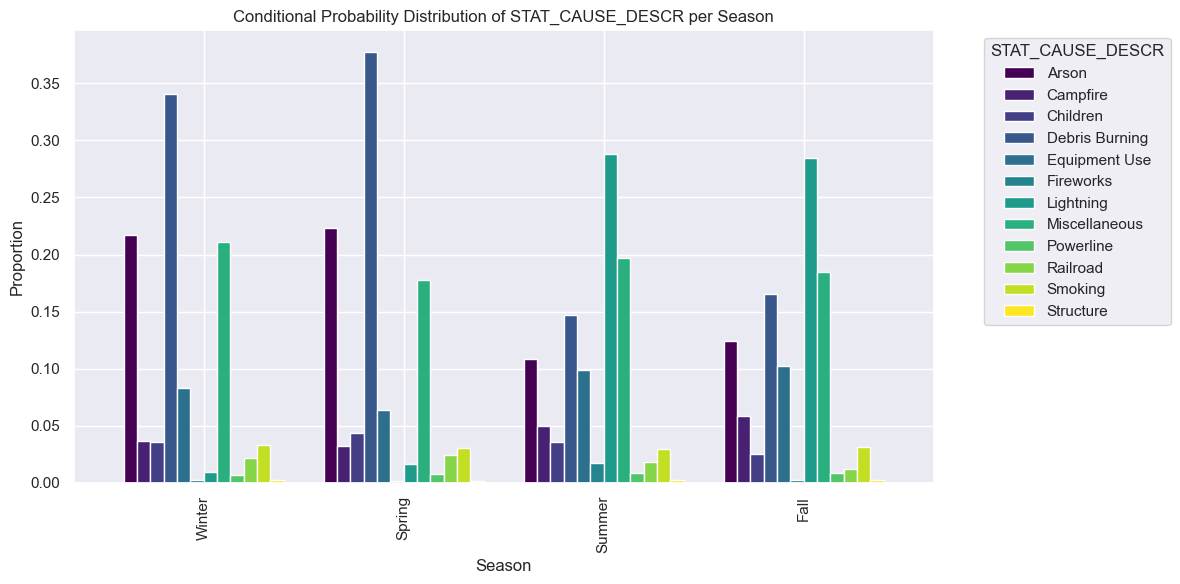

In [12]:
def create_normalized_matrix(df, categorical_feature, season_feature):
    print('Conditional probability distribution for: ' + categorical_feature + ' per season') 
        
    # Define the order of seasons
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    
    # Calculate the distribution of reasons for each season
    season_distributions = df.groupby(season_feature)[categorical_feature].value_counts(normalize=True).unstack(fill_value=0)
    
    # Reorder the seasons
    season_distributions = season_distributions.reindex(season_order)

    # Create bar plots for each distribution
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot reason distribution for each season
    season_distributions.plot(kind='bar', ax=ax, width=0.8, cmap='viridis')

    # Set plot title and labels
    ax.set_title(f'Conditional Probability Distribution of {categorical_feature} per Season')
    ax.set_xlabel('Season')
    ax.set_ylabel('Proportion')

    # Move legend to the side
    ax.legend(title=categorical_feature, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage
categorical_feature = 'STAT_CAUSE_DESCR'
season_feature = 'Season'
create_normalized_matrix(data, categorical_feature,season_feature)